In [1]:
#General DS Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# working with dates
import datetime as dt
# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 
# holt's linear trend model. 
from statsmodels.tsa.api import Holt, ExponentialSmoothing

#My imports
import model as m
import wrangle as w
import explore as e

#warnings
import warnings
warnings.filterwarnings('ignore')
# plotting defaults
plt.rcParams['font.family'] = 'monospace'
plt.rc('figure', figsize=(11, 7))
plt.style.use('seaborn-dark')
plt.rc('font', size=16)

In [2]:
# #get my data from csv files
# df2015 = pd.read_csv("crime-incident-reports-2015.csv")
# df2016 = pd.read_csv("crime-incident-reports-2016.csv")
# df2017 = pd.read_csv("crime-incident-reports-2017.csv")
# df2018 = pd.read_csv("crime-incident-reports-2018.csv")
# df2019 = pd.read_csv("crime-incident-reports-2019.csv")
# df2020 = pd.read_csv("crime-incident-reports-2020.csv")
# df2021 = pd.read_csv("crime-incident-reports-2021.csv")
# df2022 = pd.read_csv("crime-incident-reports-2022.csv")

In [3]:
# #Looking at the data by year
# df2015.info(), df2016.info(), df2017.info(), df2018.info(), df2019.info(), df2020.info(), df2021.info()

In [4]:
# # Forming a table from DFs
# table = []
# table.append(df2015)
# table.append(df2016)
# table.append(df2017)
# table.append(df2018)
# table.append(df2019)
# table.append(df2020)
# table.append(df2021)
# table.append(df2022)

In [5]:
# # #Combine all tables, ignore index
# df = pd.concat(table, ignore_index=True)

In [6]:
# #Save data as combined csv
# df.to_csv('boston_crime.csv')

In [7]:
#Get CSV from file
# df = pd.read_csv('boston_crime.csv', index_col=0)

In [2]:
def aggregate_csv():
    '''This function concatenates all yearly crime reports and returns one 
    dataframe with all project data'''
    #Get data from CSV files
    df2015 = pd.read_csv("crime-incident-reports-2015.csv")
    df2016 = pd.read_csv("crime-incident-reports-2016.csv")
    df2017 = pd.read_csv("crime-incident-reports-2017.csv")
    df2018 = pd.read_csv("crime-incident-reports-2018.csv")
    df2019 = pd.read_csv("crime-incident-reports-2019.csv")
    df2020 = pd.read_csv("crime-incident-reports-2020.csv")
    df2021 = pd.read_csv("crime-incident-reports-2021.csv")
    df2022 = pd.read_csv("crime-incident-reports-2022.csv")
    # # Forming a table from DFs
    table = []
    table.append(df2015)
    table.append(df2016)
    table.append(df2017)
    table.append(df2018)
    table.append(df2019)
    table.append(df2020)
    table.append(df2021)
    table.append(df2022)
    # # #Combine all tables, ignore index
    df = pd.concat(table, ignore_index=True)
    # #Save data as combined csv
    df.to_csv('boston_crime.csv')
    #Get CSV from file
    df = pd.read_csv('boston_crime.csv', index_col=0)
    
    return df

In [3]:
w.aggregate_csv()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192068249,2647,Other,THREATS TO DO BODILY HARM,B2,280,NaN,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,NaN,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,Fraud,FRAUD - IMPERSONATION,A1,172,NaN,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,Fraud,FRAUD - IMPERSONATION,E18,525,NaN,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,159,NaN,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652413,149210376,3110,NaN,SERVICE TO OTHER AGENCY,B2,,0,2022-01-02 00:00:00,2022,1,Sunday,0,NaN,WASHINGTON ST & ROXBURY ST\nBOSTON MA 02119\n...,42.329600,-71.084620,"(42.32959998129787, -71.08462000476281)"
652414,122056850,3801,NaN,M/V ACCIDENT - OTHER,D4,271,0,2022-07-28 19:40:00,2022,7,Thursday,19,NaN,MASSACHUSETTS AVE & HARRISON AVE\nBOSTON MA 0...,42.334910,-71.075170,"(42.334909956083834, -71.07517004893332)"
652415,122004001,3115,NaN,INVESTIGATE PERSON,E13,912,0,2022-01-19 09:30:00,2022,1,Wednesday,9,NaN,HEATH ST,42.325131,-71.099408,"(42.32513050637361, -71.09940814578592)"
652416,111077848,3115,NaN,INVESTIGATE PERSON,E5,691,0,2022-10-09 00:00:00,2022,10,Sunday,0,NaN,CENTRE ST,42.287094,-71.148221,"(42.28709355259107, -71.14822128377165)"


In [2]:
#Import our data from a .csv file, take a peek
df = w.get_clean_data()
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [3]:
#Creating a new dataframe for only offenses containing fraud in their crime description:
fraud_df = w.create_fraud_df(df)
fraud_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1
2015-06-15,I162055778,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,6,Monday,9,Part Two,DARTMOUTH ST,42.342830,-71.073747,"(42.34283015, -71.07374670)",1
2015-06-15,I152049596,1106,confidence games,fraud - credit card / atm fraud,B3,470,0,2015,6,Monday,13,Part Two,COLORADO ST,42.277793,-71.099172,"(42.27779311, -71.09917239)",1
2015-06-15,I152049603,1102,fraud,fraud - false pretense / scheme,D4,128,0,2015,6,Monday,13,Part Two,STUART ST,42.349836,-71.071051,"(42.34983631, -71.07105135)",1


In [4]:
#Now grouping by day
fraud_df = fraud_df.groupby(['date']).sum()

## Seasonal decomposition plot

In [5]:
# ### Performing train-test split
train = fraud_df.loc[:'2019-03-14']
validate = fraud_df.loc['2019-03-15':'2020-03-14']
test = fraud_df.loc['2020-03-15':]

In [9]:
train.head()

,offense_code,shooting,year,month,hour,lat,long,count_of_crime
date,,,,,,,,
2015-06-15,12142,0,22165,66,115,465.506774,-782.107727,11
2015-06-16,9945,0,18135,54,92,380.807546,-639.660966,9
2015-06-17,13252,0,24180,72,167,465.418112,-782.087668,12
2015-06-18,13260,0,24180,72,125,507.915044,-852.707129,12
2015-06-19,12130,0,22165,66,120,465.477288,-781.950608,11


In [10]:
#Create y out of target variable
y = train.count_of_crime

In [11]:
y.head()

date
2015-06-15    11
2015-06-16     9
2015-06-17    12
2015-06-18    12
2015-06-19    11
Name: count_of_crime, dtype: int64

In [42]:
train.index

DatetimeIndex(['2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17',
               '2017-03-18', '2017-03-19', '2017-03-20', '2017-03-21',
               '2017-03-22', '2017-03-23',
               ...
               '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-09',
               '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13',
               '2019-03-14', '2019-03-15'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

In [43]:
fraud_df.head()

,offense_code,shooting,year,month,hour,lat,long,count_of_crime
date,,,,,,,,
2015-06-15,12142,0,22165,66,115,465.506774,-782.107727,11
2015-06-16,9945,0,18135,54,92,380.807546,-639.660966,9
2015-06-17,13252,0,24180,72,167,465.418112,-782.087668,12
2015-06-18,13260,0,24180,72,125,507.915044,-852.707129,12
2015-06-19,12130,0,22165,66,120,465.477288,-781.950608,11


In [40]:
def monthly_crime_hist(fraud_df):
    #grouping by day to aggregate
    fraud_df = fraud_df.groupby(['date']).sum()
    # ### Taking pre-pandemic data
    pre_pandemic = fraud_df.loc[:'2020-03-15']
    #Create y out of target variable
    y = pre_pandemic.count_of_crime
    #Set theme
    sns.set_style("darkgrid")
    #Plot it
    y.groupby(y.index.month).sum().plot.bar(width=.9, ec='black', color='thistle')
    plt.xticks(rotation=0)
    plt.title('Pre-Pandemic Fraud Crimes are Lowest in April and May', fontsize=20)
    plt.xlabel('Month', fontsize=16)
    plt.ylabel('Count of Fraud Crimes', fontsize=16)
    plt.show()

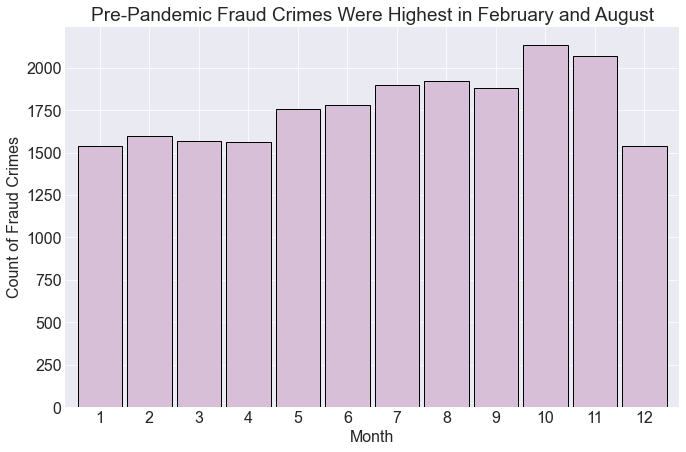

In [41]:
monthly_crime_hist(fraud_df)

In [48]:
#Seasonal Decomposition
y = train.count_of_crime.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
date,,,,
2015-06-21,10.142857,NaN,-0.295876,NaN
2015-06-28,8.571429,NaN,-0.914236,NaN
2015-07-05,11.428571,NaN,0.728392,NaN
2015-07-12,9.714286,NaN,-0.303202,NaN
2015-07-19,7.142857,NaN,1.129491,NaN


<AxesSubplot:xlabel='date'>

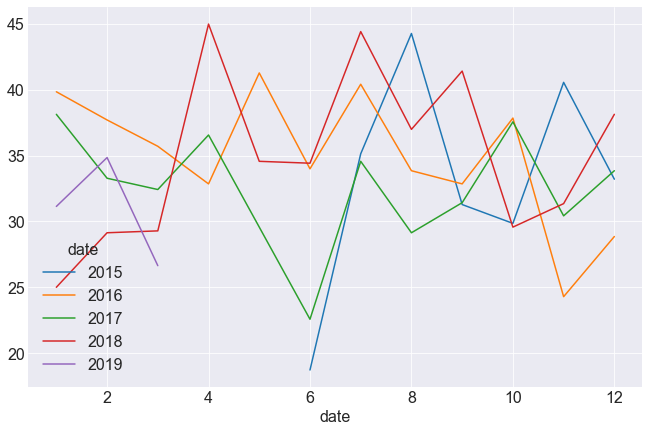

In [59]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).sum().unstack(0).plot()

In [81]:
#Create Seasonal Visualization
def decomp_viz(fraud_df):
    fraud_df = fraud_df.groupby(['date']).sum()
    # ### Performing train-test split
    train = fraud_df.loc[:'2019-03-14']
    y = train.count_of_crime.resample('W').mean()
    result = sm.tsa.seasonal_decompose(y)
    decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
    })
    #Plot it
    sns.set_theme()
    decomposition.iloc[:, 1:].plot()
    plt.title('Some Seasonality is Present, with a Trend Down in 2017', fontsize=20)
    plt.xlabel('Date by Month', fontsize=16)
    plt.show()
    
    result.plot()

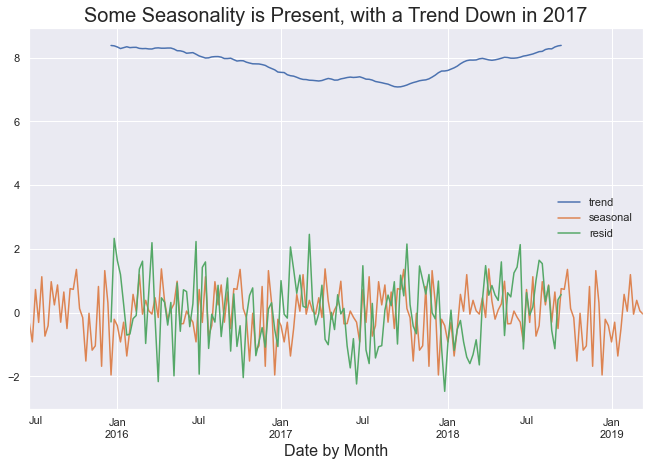

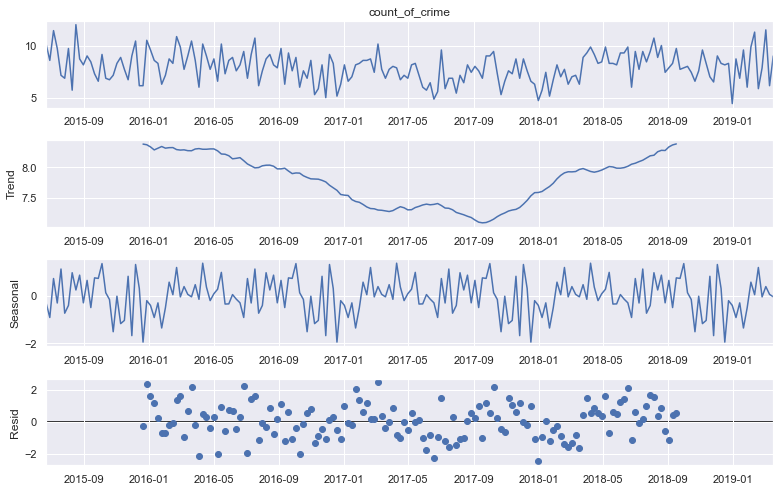

In [82]:
decomp_viz(fraud_df)

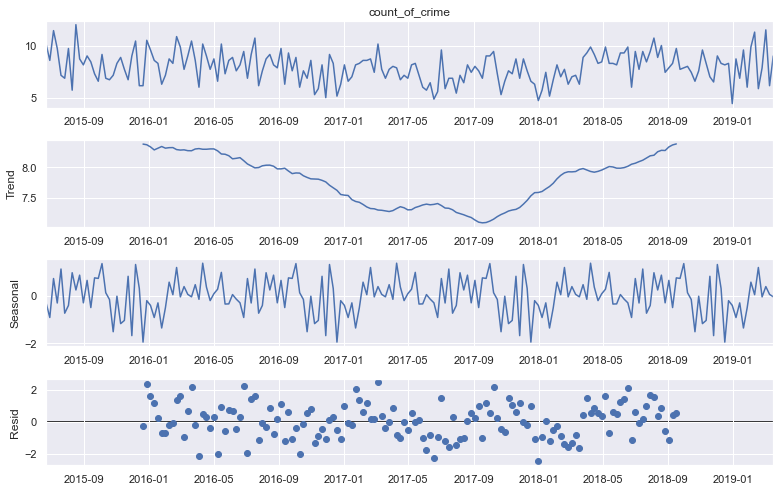

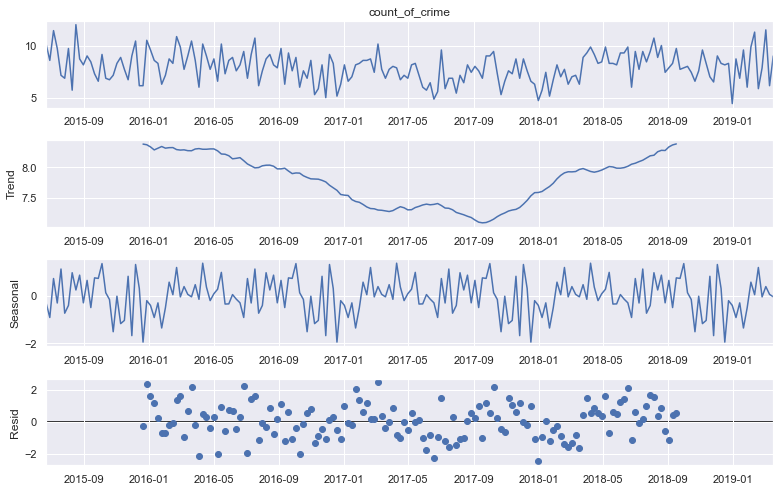

In [76]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()

In [53]:
y = train.count_of_crime.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2015-06-21,10.142857,NaN,-0.295876,NaN
2015-06-28,8.571429,NaN,-0.914236,NaN
2015-07-05,11.428571,NaN,0.728392,NaN
2015-07-12,9.714286,NaN,-0.303202,NaN
2015-07-19,7.142857,NaN,1.129491,NaN


<AxesSubplot:xlabel='date'>

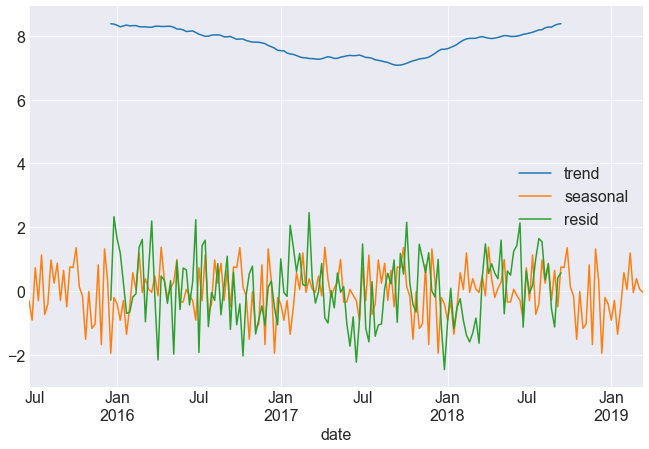

In [54]:
decomposition.iloc[:, 1:].plot()

In [10]:
def combine_data():
    ''' Combine retrieved CSV files from Boston Crime Incident Reports Website
    (https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system)
    into one CSV
    '''
    #get my data from csv files
    df2015 = pd.read_csv("crime-incident-reports-2015.csv")
    df2016 = pd.read_csv("crime-incident-reports-2016.csv")
    df2017 = pd.read_csv("crime-incident-reports-2017.csv")
    df2018 = pd.read_csv("crime-incident-reports-2018.csv")
    df2019 = pd.read_csv("crime-incident-reports-2019.csv")
    df2020 = pd.read_csv("crime-incident-reports-2020.csv")
    df2021 = pd.read_csv("crime-incident-reports-2021.csv")
    df2022 = pd.read_csv("crime-incident-reports-2022.csv")
    #Forming a table from DFs
    table = []
    table.append(df2015)
    table.append(df2016)
    table.append(df2017)
    table.append(df2018)
    table.append(df2019)
    table.append(df2020)
    table.append(df2021)
    table.append(df2022)
    #Combine all tables, ignore index
    df = pd.concat(table, ignore_index=True)
    #Save data as combined csv
    df.to_csv('boston_crime.csv')
    #Get CSV from file
    df = pd.read_csv('boston_crime.csv', index_col=0)
    
    return df

In [11]:
#Peeking at the data
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [12]:
#Rename columns to remove capital letters
#df['INCIDENT_NUMBER'] = df['INCIDENT_NUMBER'].str.lower()
df.columns = df.columns.str.lower()

In [13]:
#Looking at 7 Occured on date, see if there are nulls
df.isnull().sum()
#The most nulls are in shooting, which we can input with zero (could be incorrect but theres no data)

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

In [14]:
#see nulls in shooting where offense code is homicide
len(df[(df.shooting.isnull()) & (df.offense_code == 111)])

0

In [15]:
#Let's replace white space and empty cells with nan values
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)

In [16]:
#Checking offense code group to see what to do with the nulls
df.offense_code_group.value_counts()

unknown                                      299165
motor vehicle accident response               41064
larceny                                       28906
medical assistance                            26211
investigate person                            20425
                                              ...  
gambling                                          8
human trafficking                                 8
burglary - no property taken                      5
human trafficking - involuntary servitude         2
biological threat                                 2
Name: offense_code_group, Length: 67, dtype: int64

In [17]:
df[df.offense_code_group.isna()]
#df[df.offense_code_group.isnull()]
#Lets replace with unknown for Nan

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location


In [18]:
#Replace NaN values in offense code group with unknown
df['offense_code_group'].fillna("unknown", inplace=True)

In [19]:
df[df.offense_code_group == 'unknown']

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
353253,102091671,2647,unknown,threats to do bodily harm,B3,417,0,2019-11-12 12:00:00,2019,11,Tuesday,12,unknown,MORA ST,42.282082,-71.073649,"(42.28208197671972, -71.07364874515646)"
353254,102095489,3115,unknown,investigate person,E18,520,0,2019-11-25 16:30:00,2019,11,Monday,16,unknown,POYDRAS ST,42.256216,-71.124019,"(42.256215920402155, -71.12401947329023)"
353255,102096818,2905,unknown,val - violation of auto law,A1,0,0,2019-11-30 21:00:00,2019,11,Saturday,21,unknown,SUDBURY ST & CAMBRIDGE ST\nBOSTON MA 02108\nU...,42.360866,-71.061316,"(42.360866027118476, -71.0613160019785)"
353256,129092894,3201,unknown,property - lost/ missing,NaN,503,0,2019-11-16 13:30:00,2019,11,Saturday,13,unknown,AMERICAN LEGION HWY,42.284467,-71.111831,"(42.28446742674232, -71.11183088758158)"
353257,129099920,3301,unknown,verbal dispute,B2,330,0,2019-12-12 07:50:00,2019,12,Thursday,7,unknown,COLUMBIA ROAD,0.000000,0.000000,"(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652413,149210376,3110,unknown,service to other agency,B2,0,0,2022-01-02 00:00:00,2022,1,Sunday,0,unknown,WASHINGTON ST & ROXBURY ST\nBOSTON MA 02119\n...,42.329600,-71.084620,"(42.32959998129787, -71.08462000476281)"
652414,122056850,3801,unknown,m/v accident - other,D4,271,0,2022-07-28 19:40:00,2022,7,Thursday,19,unknown,MASSACHUSETTS AVE & HARRISON AVE\nBOSTON MA 0...,42.334910,-71.075170,"(42.334909956083834, -71.07517004893332)"
652415,122004001,3115,unknown,investigate person,E13,912,0,2022-01-19 09:30:00,2022,1,Wednesday,9,unknown,HEATH ST,42.325131,-71.099408,"(42.32513050637361, -71.09940814578592)"
652416,111077848,3115,unknown,investigate person,E5,691,0,2022-10-09 00:00:00,2022,10,Sunday,0,unknown,CENTRE ST,42.287094,-71.148221,"(42.28709355259107, -71.14822128377165)"


In [20]:
#Let's look at shooting data, deal with the nulls

In [21]:
df.shooting.value_counts()

0    647417
1      5001
Name: shooting, dtype: int64

In [22]:
#Changing Y in shooting to 1(Yes)
df.loc[df["shooting"] == "Y", "shooting"] = 1

In [23]:
df.shooting.value_counts()

0    647417
1      5001
Name: shooting, dtype: int64

In [24]:
#Replace Nan Values in shooting with zeroes
df['shooting'].fillna(0, inplace=True)

In [25]:
#Check for nulls, none are left
df.shooting.isnull().sum()

0

In [26]:
#why are there multiple zeroes and ones in my column? Let me recast the column data type as integer
df['shooting'] = df['shooting'].astype(int)
print(df.shooting.dtypes)

int64


In [27]:
df.shooting.value_counts()

0    647417
1      5001
Name: shooting, dtype: int64

In [28]:
#Looks good to me

In [29]:
#Going back to missing values
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

In [30]:
#UCR Part has alot of null values, lets check it out

In [31]:
df.ucr_part.value_counts()

unknown       299262
Part Three    176042
Part Two      107656
Part One       68068
Other           1390
Name: ucr_part, dtype: int64

In [32]:
#Lets fill nulls here with unknown, its not going to be important to my analysis
#Replace NaN values in ucr part with unknown
df['ucr_part'].fillna("unknown", inplace=True)

In [33]:
#No more nulls
df.ucr_part.isnull().sum(), df.ucr_part.value_counts()

(0,
 unknown       299262
 Part Three    176042
 Part Two      107656
 Part One       68068
 Other           1390
 Name: ucr_part, dtype: int64)

In [34]:
#Going back and looking at nulls
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

In [35]:
#Lets check reporting area
df.reporting_area.value_counts()

0      97865
355     9946
465     7698
167     7013
282     6409
       ...  
000       17
190       10
950        2
218        1
666        1
Name: reporting_area, Length: 881, dtype: int64

In [36]:
#Going to fill NaN with zeroes for reporting area, which represents where a crime is reported from
df['reporting_area'].fillna(0, inplace=True)

In [37]:
#No more nulls
df.reporting_area.isnull().sum()

0

In [38]:
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

In [39]:
len(df)

652418

In [40]:
#Number of unique incidents in this data
df.incident_number.nunique()

610345

#### 93.55 percent of the data involve unique incidents, but lets look at incidents with multiple rows

In [41]:
#It's an object
df.incident_number.dtypes

dtype('O')

In [42]:
#find duplicate rows across all columns
duplicateRows = df[df.duplicated()]
duplicateRows

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1250,I152107190,413,aggravated assault,assault - aggravated - battery,B3,427,1,2015-12-29 08:47:00,2015,12,Tuesday,8,Part One,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1252,I152107190,111,homicide,"murder, non-negligient manslaughter",B3,427,1,2015-12-29 08:47:00,2015,12,Tuesday,8,Part One,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1254,I152107190,3125,warrant arrests,warrant arrest,B3,427,1,2015-12-29 08:47:00,2015,12,Tuesday,8,Part Three,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1256,I152107190,1501,firearm violations,"weapon - firearm - carrying / possessing, etc",B3,427,1,2015-12-29 08:47:00,2015,12,Tuesday,8,Part Two,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
2438,I152105851,413,aggravated assault,assault - aggravated - battery,E13,302,1,2015-12-23 15:39:00,2015,12,Wednesday,15,Part One,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353245,I070720870-00,3125,warrant arrests,warrant arrest,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353246,I070720870-00,3125,warrant arrests,warrant arrest,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353248,I070720870-00,802,simple assault,assault & battery,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353249,I070720870-00,3125,warrant arrests,warrant arrest,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"


#### Looking at these rows, there's no way to know if they are errors or real values. Its likely they are one incident with multiple arrests, so therefore I choose to keep them. There's no way to know if we have a bigger error in the collection of these statistics--i.e. this data was collected BETTER than all others

In [47]:
# lets look at street
df.street.value_counts()

WASHINGTON ST                                           34091
BLUE HILL AVE                                           16275
BOYLSTON ST                                             12590
HARRISON AVE                                            11475
CENTRE ST                                               10055
                                                        ...  
295 OLD COLONY AVE\nSOUTH BOSTON  MA 02127\nUNITED S        1
DOT AVE                                                     1
BLUE HILL AVENUE & HAVELOCK ST\nBOSTON  MA 02124\nUN        1
241 MARKET ST\nBOSTON  MA 02135\nUNITED STATES              1
HARRISON AVENUE / MELNEA CASS BLVD                          1
Name: street, Length: 16835, dtype: int64

In [48]:
df[df.street.isnull()]
#Some streets that are null have gps data, I wonder if I could use that. Others have all location data missing--I
#think we should drop those that have nulls in all location fields

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
166,I162041845,3201,property lost,property - lost,D4,0,0,2015-09-01 12:00:00,2015,9,Tuesday,12,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
217,I162024760,3018,medical assistance,sick/injured/medical - police,D4,0,0,2015-09-28 14:41:00,2015,9,Monday,14,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
380,I162005633,3201,property lost,property - lost,D4,0,0,2015-11-15 22:00:00,2015,11,Sunday,22,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
441,I162003177,413,aggravated assault,assault - aggravated - battery,D4,0,0,2015-12-28 17:55:00,2015,12,Monday,17,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
537,I162001010,3831,motor vehicle accident response,m/v - leaving scene - property damage,C11,0,0,2015-12-31 18:30:00,2015,12,Thursday,18,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561516,212028147,3831,unknown,m/v - leaving scene - property damage,B2,0,0,2021-05-01 08:24:00,2021,5,Saturday,8,unknown,NaN,42.327987,-71.099354,"(42.32798700396488, -71.09935402988641)"
561529,212028130,3006,unknown,sick/injured/medical - person,A1,111,0,2021-05-01 03:00:00,2021,5,Saturday,3,unknown,NaN,42.352370,-71.062600,"(42.352370011853225, -71.06259996388145)"
561532,212028127,3802,unknown,m/v accident - property damage,B2,320,0,2021-05-01 02:33:00,2021,5,Saturday,2,unknown,NaN,42.308468,-71.083277,"(42.30846803058291, -71.08327694723572)"
582626,210209890,3115,unknown,investigate person,A1,162,0,2021-05-14 10:00:00,2021,5,Friday,10,unknown,NaN,42.347321,-71.064412,"(42.34732103019411, -71.06441203938374)"


In [49]:
#this looks right
df[df.street.isnull() & df.lat.isnull() & df.long.isnull()]

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
166,I162041845,3201,property lost,property - lost,D4,0,0,2015-09-01 12:00:00,2015,9,Tuesday,12,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
217,I162024760,3018,medical assistance,sick/injured/medical - police,D4,0,0,2015-09-28 14:41:00,2015,9,Monday,14,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
380,I162005633,3201,property lost,property - lost,D4,0,0,2015-11-15 22:00:00,2015,11,Sunday,22,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
441,I162003177,413,aggravated assault,assault - aggravated - battery,D4,0,0,2015-12-28 17:55:00,2015,12,Monday,17,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
537,I162001010,3831,motor vehicle accident response,m/v - leaving scene - property damage,C11,0,0,2015-12-31 18:30:00,2015,12,Thursday,18,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352726,I182000372,3410,towed,towed motor vehicle,C6,0,0,2018-01-02 13:16:00,2018,1,Tuesday,13,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
352966,I182000064,3803,motor vehicle accident response,m/v accident - personal injury,B2,0,0,2018-01-01 03:29:00,2018,1,Monday,3,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
352967,I182000064,2101,operating under the influence,operating under the influence alcohol,B2,0,0,2018-01-01 03:29:00,2018,1,Monday,3,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
353168,I172002908,802,simple assault,assault simple - battery,A1,0,0,2018-01-16 16:00:00,2018,1,Tuesday,16,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [50]:
#Creating a df with the missing street, lat and long values
missing_location = df[df.street.isnull() & df.lat.isnull() & df.long.isnull() & df.district.isnull()]

In [51]:
missing_location
#9246 rows, but since we are focusing on location (perhaps), we can afford to drop these rows with null values.
#May be able to impute location based on street if we have SOME location data (besides district)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1798,I152106585,2907,violations,val - operating after rev/susp.,NaN,0,0,2015-12-26 20:49:00,2015,12,Saturday,20,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
4917,I152103147,619,larceny,larceny all others,NaN,0,0,2015-12-14 13:00:00,2015,12,Monday,13,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
5492,I152102486,1300,recovered stolen property,stolen property - buying / receiving / possessing,NaN,462,0,2015-12-12 00:37:00,2015,12,Saturday,0,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
5493,I152102486,735,auto theft recovery,recovered - mv recovered in boston (stolen out...,NaN,462,0,2015-12-12 00:37:00,2015,12,Saturday,0,Other,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
5494,I152102486,2907,violations,val - operating after rev/susp.,NaN,462,0,2015-12-12 00:37:00,2015,12,Saturday,0,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308438,I182047835,1842,drug violation,"drugs - poss class a - heroin, etc.",NaN,0,0,2018-06-19 13:13:00,2018,6,Tuesday,13,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
308439,I182047835,1805,drug violation,drugs - class a trafficking over 18 grams,NaN,0,0,2018-06-19 13:13:00,2018,6,Tuesday,13,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
320587,I182034983,3006,medical assistance,sick/injured/medical - person,NaN,0,0,2018-05-08 18:31:00,2018,5,Tuesday,18,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
334873,I182018583,1402,vandalism,vandalism,NaN,0,0,2018-03-11 16:10:00,2018,3,Sunday,16,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [52]:
#A variation of offenses, these are easy to drop
missing_location.offense_code_group.value_counts()

motor vehicle accident response    22
drug violation                     11
violations                          7
harbor related incidents            7
other                               6
larceny                             5
medical assistance                  5
auto theft recovery                 4
vandalism                           4
larceny from motor vehicle          4
investigate person                  3
simple assault                      3
auto theft                          3
warrant arrests                     3
prostitution                        1
investigate property                1
ballistics                          1
police service incidents            1
towed                               1
prisoner related incidents          1
aggravated assault                  1
recovered stolen property           1
property found                      1
Name: offense_code_group, dtype: int64

In [53]:
#Let's leave this here in case we need to drop
#df.drop(missing_location, inplace = True)

In [54]:
#Going back to look at nulls
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

### District, street, lat, long are all related to location. I dont know how to deal with these currently, 

In [55]:
#Let's see if we know the date where these lat and longs are missing
missing_lat_long = df[(df.lat.isnull()) & (df.long.isnull())]

In [56]:
missing_lat_long.year.value_counts()

2017    7029
2016    6944
2018    6429
2015    2128
Name: year, dtype: int64

In [57]:
#More missing in 2017, but they are spread over several years. It may impact our forecasting to drop, but it may be better

## Plan for now is to drop all rows with null values, lets see what that data loss looks like

In [58]:
len(df)

652418

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652418 entries, 0 to 652417
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_number      652418 non-null  object 
 1   offense_code         652418 non-null  int64  
 2   offense_code_group   652418 non-null  object 
 3   offense_description  652418 non-null  object 
 4   district             648116 non-null  object 
 5   reporting_area       652418 non-null  object 
 6   shooting             652418 non-null  int64  
 7   occurred_on_date     652418 non-null  object 
 8   year                 652418 non-null  int64  
 9   month                652418 non-null  int64  
 10  day_of_week          652418 non-null  object 
 11  hour                 652418 non-null  int64  
 12  ucr_part             652418 non-null  object 
 13  street               640529 non-null  object 
 14  lat                  629888 non-null  float64
 15  long             

In [60]:
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

In [61]:
df[df.street.isnull()]

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
166,I162041845,3201,property lost,property - lost,D4,0,0,2015-09-01 12:00:00,2015,9,Tuesday,12,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
217,I162024760,3018,medical assistance,sick/injured/medical - police,D4,0,0,2015-09-28 14:41:00,2015,9,Monday,14,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
380,I162005633,3201,property lost,property - lost,D4,0,0,2015-11-15 22:00:00,2015,11,Sunday,22,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
441,I162003177,413,aggravated assault,assault - aggravated - battery,D4,0,0,2015-12-28 17:55:00,2015,12,Monday,17,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
537,I162001010,3831,motor vehicle accident response,m/v - leaving scene - property damage,C11,0,0,2015-12-31 18:30:00,2015,12,Thursday,18,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561516,212028147,3831,unknown,m/v - leaving scene - property damage,B2,0,0,2021-05-01 08:24:00,2021,5,Saturday,8,unknown,NaN,42.327987,-71.099354,"(42.32798700396488, -71.09935402988641)"
561529,212028130,3006,unknown,sick/injured/medical - person,A1,111,0,2021-05-01 03:00:00,2021,5,Saturday,3,unknown,NaN,42.352370,-71.062600,"(42.352370011853225, -71.06259996388145)"
561532,212028127,3802,unknown,m/v accident - property damage,B2,320,0,2021-05-01 02:33:00,2021,5,Saturday,2,unknown,NaN,42.308468,-71.083277,"(42.30846803058291, -71.08327694723572)"
582626,210209890,3115,unknown,investigate person,A1,162,0,2021-05-14 10:00:00,2021,5,Friday,10,unknown,NaN,42.347321,-71.064412,"(42.34732103019411, -71.06441203938374)"


In [62]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [63]:
#Make everything lowercase in offense code group and description
df['offense_code_group'] = df['offense_code_group'].str.lower()
df['offense_description'] = df['offense_description'].str.lower()

In [64]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [65]:
#Finding instances where fraud is in offense_description
df[df['offense_description'].str.contains('fraud')] #21247 rows returned

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"
5,I182090458,1107,fraud,fraud - impersonation,C11,336,0,2015-12-04 00:00:00,2015,12,Friday,0,Part Two,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652297,222091843,1109,unknown,fraud - wire,A1,77,0,2022-11-28 00:00:00,2022,11,Monday,0,unknown,NEW SUDBURY ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
652301,222091838,1102,unknown,fraud - false pretense / scheme,A7,28,0,2022-11-27 14:30:00,2022,11,Sunday,14,unknown,PARIS ST,42.370818,-71.039291,"(42.3708180467024, -71.03929078135145)"
652315,222091822,1106,unknown,fraud - credit card / atm fraud,C6,177,0,2022-11-25 08:00:00,2022,11,Friday,8,unknown,SOUTHAMPTON ST,42.332108,-71.070144,"(42.332108429494895, -71.07014394813551)"
652326,222091805,1102,unknown,fraud - false pretense / scheme,C11,0,0,2022-11-28 01:31:00,2022,11,Monday,1,unknown,ADAMS ST,42.272306,-71.067214,"(42.27230624022605, -71.06721386165373)"


In [66]:
def get_clean_data():
    '''This function takes in the Boston Crime dataframe from a csv file and addresses the messiness
    by renaming columns, filling whitespace, imputing NaN values, standardizing field values, and recasting
    data types'''
    #Get CSV from file
    df = pd.read_csv('boston_crime.csv', index_col=0)
    #Rename columns to remove capital letters
    df.columns = df.columns.str.lower()
    #Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df
    df = df.replace(r'^\s*$', np.nan, regex=True)
    #Replace NaN values in offense code group with unknown
    df['offense_code_group'].fillna("unknown", inplace=True)
    #Changing Y in shooting to 1(Yes)
    df.loc[df["shooting"] == "Y", "shooting"] = 1
    #Replace Nan Values in shooting with zeroes
    df['shooting'].fillna(0, inplace=True)
    #Recasting shooting column as an integer
    df['shooting'] = df['shooting'].astype(int)
    #Replace NaN values in ucr part with unknown
    df['ucr_part'].fillna("unknown", inplace=True)
    #Going to fill NaN with zeroes for reporting area, which represents where a crime is reported from
    df['reporting_area'].fillna(0, inplace=True)
    #Make everything lowercase in offense code group and description
    df['offense_code_group'] = df['offense_code_group'].str.lower()
    df['offense_description'] = df['offense_description'].str.lower()
    
    return df

In [67]:
df = w.get_clean_data()

/Users/crislucin/codeup-data-science/boston-crime-data-project/wrangle.py:43: DtypeWarning: Columns (1,3,7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('boston_crime.csv', index_col=0)


In [68]:
df.head(2)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"


## Extracting Fraud Crimes

In [69]:
# #21236 rows for fraud this way
# offense_code_fraud = df[(df['offense_code'] == 1101) | (df['offense_code'] == 1102) | (df['offense_code'] == 1103)\
# | (df['offense_code'] == 1104) | (df['offense_code'] == 1105) | (df['offense_code'] == 1106)\
# | (df['offense_code'] == 1107) | (df['offense_code'] == 1108) | (df['offense_code'] == 1109)]

In [70]:
#Lets use this to get as much fraud data out of the dataset
#6713 rows 

#### This is the best, so far, going to subset this out using offense description

In [71]:
fraud_df = df[df['offense_description'].str.contains('fraud')]

In [72]:
fraud_df.info() #nulls in district and location, we will ignore those for now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21247 entries, 1 to 652354
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   incident_number      21247 non-null  object 
 1   offense_code         21247 non-null  int64  
 2   offense_code_group   21247 non-null  object 
 3   offense_description  21247 non-null  object 
 4   district             21109 non-null  object 
 5   reporting_area       21247 non-null  object 
 6   shooting             21247 non-null  int64  
 7   occurred_on_date     21247 non-null  object 
 8   year                 21247 non-null  int64  
 9   month                21247 non-null  int64  
 10  day_of_week          21247 non-null  object 
 11  hour                 21247 non-null  int64  
 12  ucr_part             21247 non-null  object 
 13  street               21166 non-null  object 
 14  lat                  21049 non-null  float64
 15  long                 21049 non-null

In [73]:
#Rename date column to make it easier
fraud_df.rename(columns = {'occurred_on_date':'date'}, inplace = True)

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/2021758675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df.rename(columns = {'occurred_on_date':'date'}, inplace = True)


In [74]:
#Occured on date is an object, lets make it date time
fraud_df['date'] = pd.to_datetime(fraud_df['date'])
fraud_df.dtypes

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/3371281466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['date'] = pd.to_datetime(fraud_df['date'])


incident_number                object
offense_code                    int64
offense_code_group             object
offense_description            object
district                       object
reporting_area                 object
shooting                        int64
date                   datetime64[ns]
year                            int64
month                           int64
day_of_week                    object
hour                            int64
ucr_part                       object
street                         object
lat                           float64
long                          float64
location                       object
dtype: object

In [75]:
fraud_df.head(2)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"


In [76]:
#adding a column to the dataframe to get a count of crime
fraud_df['count_of_crime'] = 1

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/4257955193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['count_of_crime'] = 1


In [77]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21247 entries, 1 to 652354
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   incident_number      21247 non-null  object        
 1   offense_code         21247 non-null  int64         
 2   offense_code_group   21247 non-null  object        
 3   offense_description  21247 non-null  object        
 4   district             21109 non-null  object        
 5   reporting_area       21247 non-null  object        
 6   shooting             21247 non-null  int64         
 7   date                 21247 non-null  datetime64[ns]
 8   year                 21247 non-null  int64         
 9   month                21247 non-null  int64         
 10  day_of_week          21247 non-null  object        
 11  hour                 21247 non-null  int64         
 12  ucr_part             21247 non-null  object        
 13  street               21166 non

In [78]:
#Remove hour from date time, since we aren't looking for that now
fraud_df['date'] = fraud_df['date'].dt.normalize()

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1445282499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['date'] = fraud_df['date'].dt.normalize()


In [79]:
fraud_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)",1
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)",1
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)",1
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)",1
5,I182090458,1107,fraud,fraud - impersonation,C11,336,0,2015-12-04,2015,12,Friday,0,Part Two,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)",1


In [80]:
# #Reset index to date time
fraud_df = fraud_df.set_index('date').sort_index()
fraud_df

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1
2015-06-15,I162055778,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,6,Monday,9,Part Two,DARTMOUTH ST,42.342830,-71.073747,"(42.34283015, -71.07374670)",1
2015-06-15,I152049596,1106,confidence games,fraud - credit card / atm fraud,B3,470,0,2015,6,Monday,13,Part Two,COLORADO ST,42.277793,-71.099172,"(42.27779311, -71.09917239)",1
2015-06-15,I152049603,1102,fraud,fraud - false pretense / scheme,D4,128,0,2015,6,Monday,13,Part Two,STUART ST,42.349836,-71.071051,"(42.34983631, -71.07105135)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07,222094706,1106,unknown,fraud - credit card / atm fraud,C11,355,0,2022,12,Wednesday,23,unknown,GIBSON ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)",1
2022-12-07,222094455,1106,unknown,fraud - credit card / atm fraud,C11,0,0,2022,12,Wednesday,8,unknown,TRAIN ST,42.291344,-71.053456,"(42.2913439297036, -71.05345563743083)",1
2022-12-07,222094811,1102,unknown,fraud - false pretense / scheme,C6,0,0,2022,12,Wednesday,16,unknown,NORTH POINT DR,42.319499,-71.043373,"(42.31949926471968, -71.04337317826237)",1


In [81]:
def create_fraud_df(df):
    '''This function takes in the crime dataframe, and creates a new dataframe based on the categorization
    of crime description. It also renames columns for usability, converts the date column to a DateTime type,
    takes the date and transforms the index into a DateTime index, and adds a column called "count of crime",
    which assigns a value of 1 to every row'''
    #Uses str.contains to get fraud from description
    fraud_df = df[df['offense_description'].str.contains('fraud')]
    #Rename date column to make it easier
    fraud_df.rename(columns = {'occurred_on_date':'date'}, inplace = True)
    #Occured on date is an object, lets make it date time
    fraud_df['date'] = pd.to_datetime(fraud_df['date'])
    #adding a column to the dataframe to get a count of crime
    fraud_df['count_of_crime'] = 1
    #Remove hour from date time, since we aren't looking for that now
    fraud_df['date'] = fraud_df['date'].dt.normalize()
    # #Reset index to date time
    fraud_df = fraud_df.set_index('date').sort_index()
    fraud_df
    
    return fraud_df

In [82]:
fraud_df = w.create_fraud_df(df)

/Users/crislucin/codeup-data-science/boston-crime-data-project/wrangle.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df.rename(columns = {'occurred_on_date':'date'}, inplace = True)
/Users/crislucin/codeup-data-science/boston-crime-data-project/wrangle.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['date'] = pd.to_datetime(fraud_df['date'])
/Users/crislucin/codeup-data-science/boston-crime-data-project/wrangle.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [83]:
fraud_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1
2015-06-15,I162055778,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,6,Monday,9,Part Two,DARTMOUTH ST,42.342830,-71.073747,"(42.34283015, -71.07374670)",1
2015-06-15,I152049596,1106,confidence games,fraud - credit card / atm fraud,B3,470,0,2015,6,Monday,13,Part Two,COLORADO ST,42.277793,-71.099172,"(42.27779311, -71.09917239)",1
2015-06-15,I152049603,1102,fraud,fraud - false pretense / scheme,D4,128,0,2015,6,Monday,13,Part Two,STUART ST,42.349836,-71.071051,"(42.34983631, -71.07105135)",1


In [84]:
# #Resample on day
# fraud_df.resample('D').sum()

In [85]:
#Now grouping by day
fraud_df.groupby(['date']).sum()

,offense_code,shooting,year,month,hour,lat,long,count_of_crime
date,,,,,,,,
2015-06-15,12142,0,22165,66,115,465.506774,-782.107727,11
2015-06-16,9945,0,18135,54,92,380.807546,-639.660966,9
2015-06-17,13252,0,24180,72,167,465.418112,-782.087668,12
2015-06-18,13260,0,24180,72,125,507.915044,-852.707129,12
2015-06-19,12130,0,22165,66,120,465.477288,-781.950608,11
...,...,...,...,...,...,...,...,...
2022-12-04,5516,0,10110,60,54,169.155029,-284.381760,5
2022-12-05,3306,0,6066,36,31,84.636150,-142.298720,3
2022-12-06,4415,0,8088,48,61,169.400092,-284.318481,4


### Train Test Split based on Pandemic Starting:
* On March 10, 2020, Governor Baker declared a state of emergency
* On March 15, 2020, Mayor Marty Walsh declared a state of emergency for the city of Boston
* Since the timeline is so close, I will elect to use March 15, 2020 to begin test data
* Validate data will be March 15, 2019 to March 14, 2020 (One year)
* Train data will be the beginning of this dataset to March 14, 2019

In [86]:
# # ### Performing train-test split
# train = fraud_df.loc[:'2019-03-14']
# validate = fraud_df.loc['2019-03-15':'2020-03-14']
# test = fraud_df.loc['2020-03-15':]

In [87]:
fraud_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1
2015-06-15,I162055778,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,6,Monday,9,Part Two,DARTMOUTH ST,42.342830,-71.073747,"(42.34283015, -71.07374670)",1
2015-06-15,I152049596,1106,confidence games,fraud - credit card / atm fraud,B3,470,0,2015,6,Monday,13,Part Two,COLORADO ST,42.277793,-71.099172,"(42.27779311, -71.09917239)",1
2015-06-15,I152049603,1102,fraud,fraud - false pretense / scheme,D4,128,0,2015,6,Monday,13,Part Two,STUART ST,42.349836,-71.071051,"(42.34983631, -71.07105135)",1


In [88]:
#Now grouping by day
new_df = fraud_df.groupby(['date']).sum()
new_df = new_df[['count_of_crime']]

In [89]:
#Add column to full df, do group by

In [90]:
new_df.head()

,count_of_crime
date,
2015-06-15,11
2015-06-16,9
2015-06-17,12
2015-06-18,12
2015-06-19,11


In [91]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2715 entries, 2015-06-15 to 2022-12-08
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   count_of_crime  2715 non-null   int64
dtypes: int64(1)
memory usage: 42.4 KB


In [92]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21247 entries, 2015-06-15 to 2022-12-08
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   incident_number      21247 non-null  object 
 1   offense_code         21247 non-null  int64  
 2   offense_code_group   21247 non-null  object 
 3   offense_description  21247 non-null  object 
 4   district             21109 non-null  object 
 5   reporting_area       21247 non-null  object 
 6   shooting             21247 non-null  int64  
 7   year                 21247 non-null  int64  
 8   month                21247 non-null  int64  
 9   day_of_week          21247 non-null  object 
 10  hour                 21247 non-null  int64  
 11  ucr_part             21247 non-null  object 
 12  street               21166 non-null  object 
 13  lat                  21049 non-null  float64
 14  long                 21049 non-null  float64
 15  location           

In [93]:
# ### Performing train-test split
train = new_df.loc[:'2019-03-14']
validate = new_df.loc['2019-03-15':'2020-03-14']
test = new_df.loc['2020-03-15':]

In [94]:
print(f'The length of train is:{len(train)}')
print(f'The length of validate is:{len(validate)}')
print(f'The length of test is:{len(test)}')

The length of train is:1363
The length of validate is:363
The length of test is:989


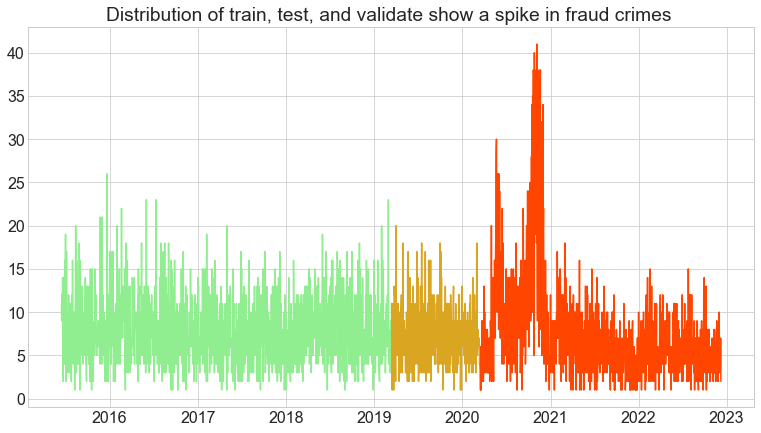

In [95]:
plt.title('Distribution of train, test, and validate show a spike in fraud crimes ')
plt.plot(train.index, train.count_of_crime, color='lightgreen')
plt.plot(validate.index, validate.count_of_crime, color='goldenrod')
plt.plot(test.index, test.count_of_crime, color='orangered')
plt.show()

#### This is taking all crime data by day

## Explore

In [96]:
train.head(2)

,count_of_crime
date,
2015-06-15,11
2015-06-16,9


array([[<AxesSubplot:title={'center':'count_of_crime'}>]], dtype=object)

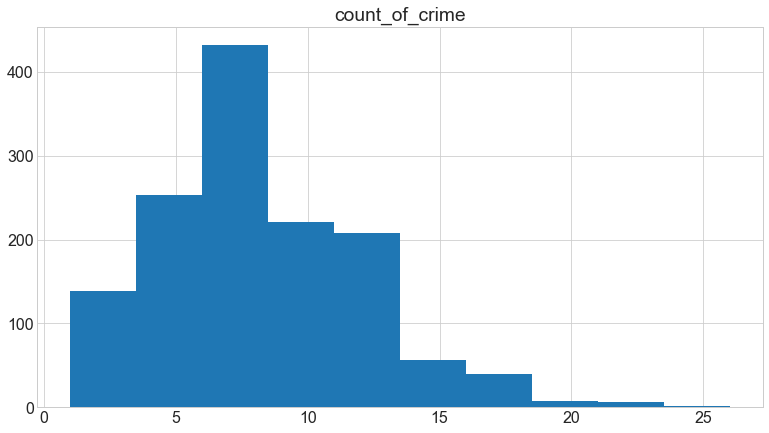

In [97]:
#Looks fairly normal
train.hist()

In [98]:
print(f'Mean of count of crime per day:{train.count_of_crime.mean()}')
print(f'Median of count of crime per day:{train.count_of_crime.median()}')
print(f'Mode of count of crime per day:{train.count_of_crime.mode()}')

Mean of count of crime per day:7.926632428466617
Median of count of crime per day:7.0
Mode of count of crime per day:0    7
Name: count_of_crime, dtype: int64


### 7 fraud crimes per day is the median and mode, should be a good baseline

<AxesSubplot:xlabel='date'>

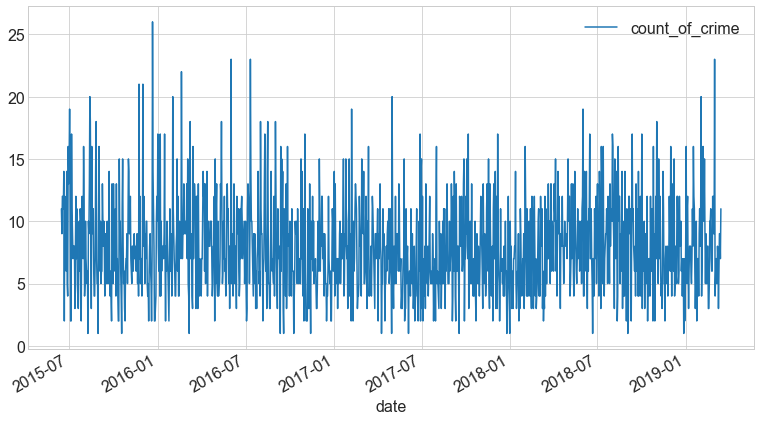

In [99]:
train.plot()

<AxesSubplot:title={'center':'Monthly Average'}, xlabel='date'>

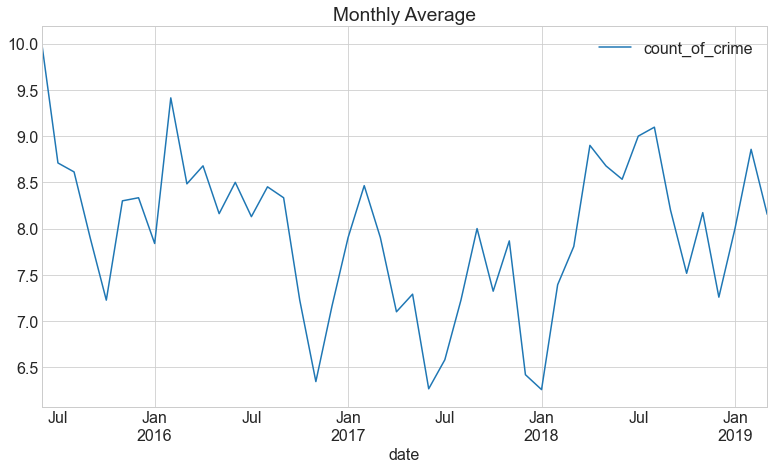

In [100]:
#Resample by month
train.resample('M').mean().plot(title='Monthly Average')

<AxesSubplot:title={'center':'2 week average'}, xlabel='date'>

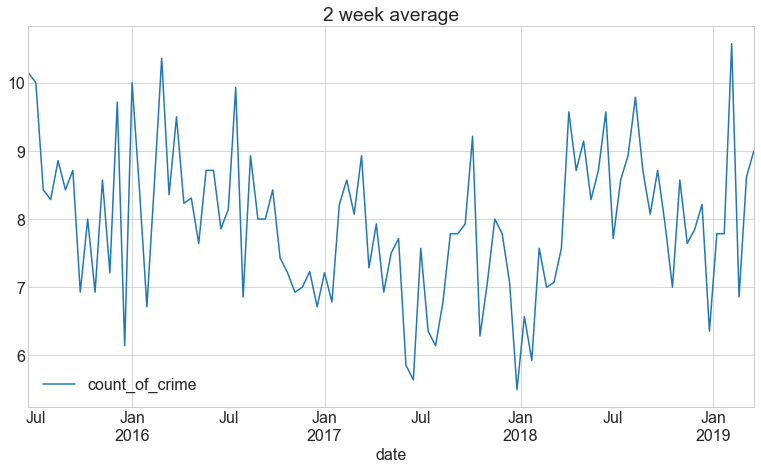

In [101]:
#Bi weekly average
train.resample('2W').mean().plot(title='2 week average')

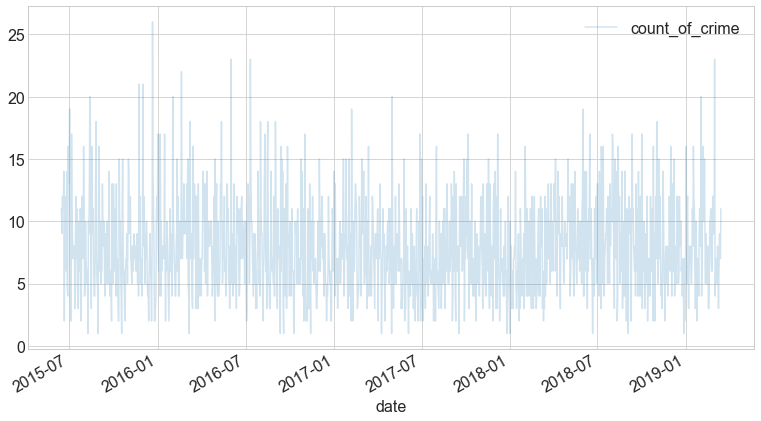

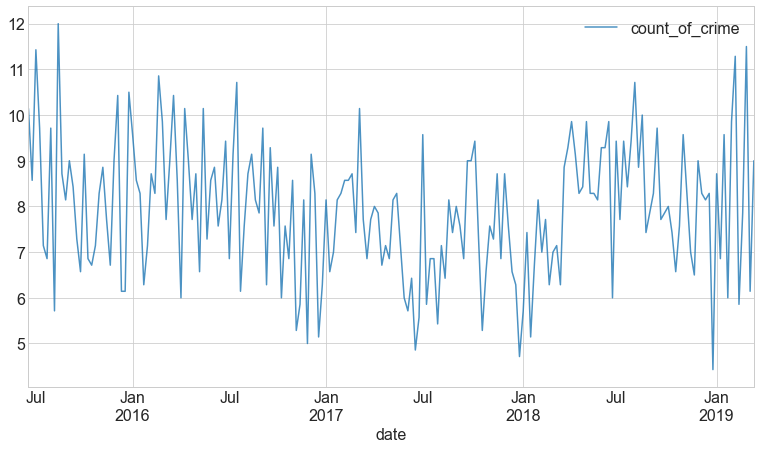

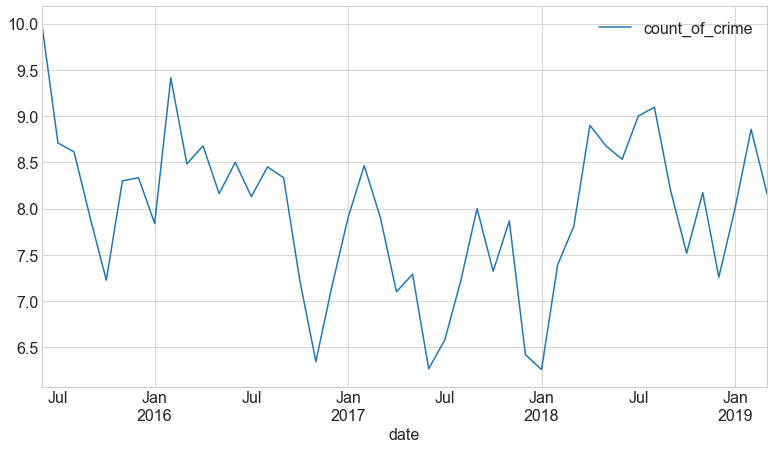

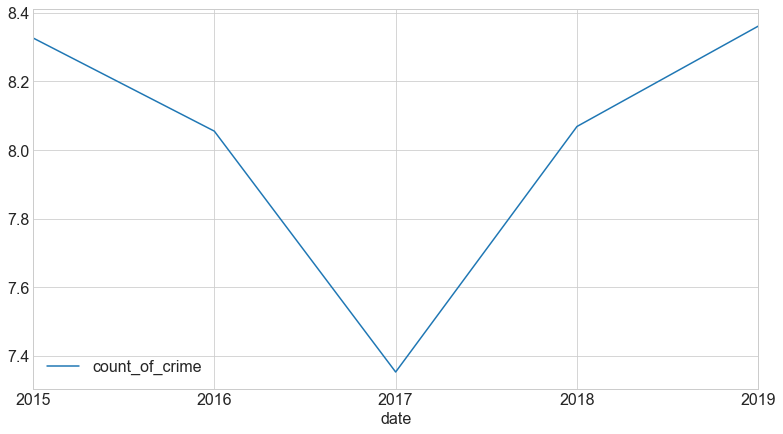

In [102]:
train.plot(alpha=.2, label='Daily')
train.resample('W').mean().plot(alpha=.8, label='Weekly')
train.resample('M').mean().plot(label='Montly')
train.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

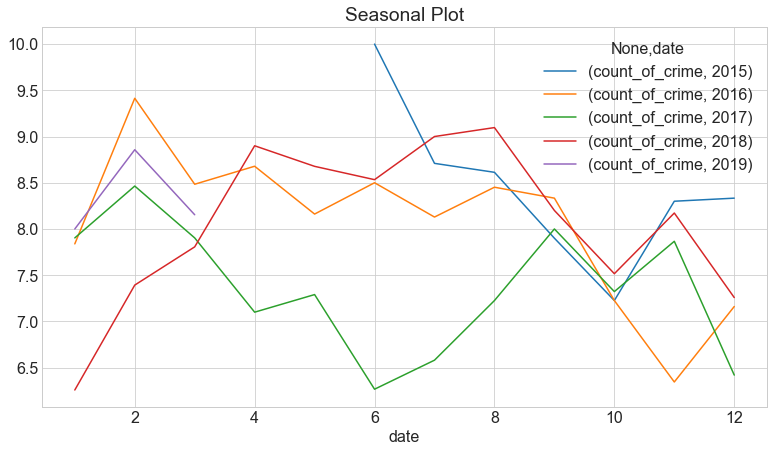

In [103]:
#Seasonal Plot?
# .unstack turns an index level into columns
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=182')

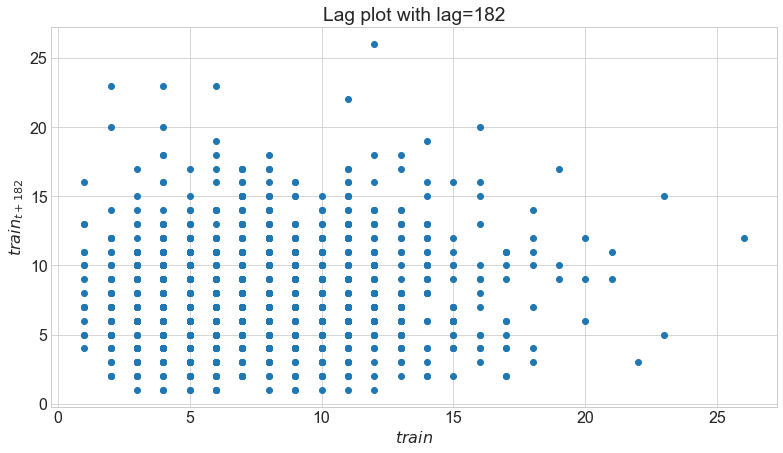

In [104]:
plt.scatter(train, train.shift(-182))
plt.xlabel('$train$')
plt.ylabel('$train_{t + 182}$')
plt.title('Lag plot with lag=182')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

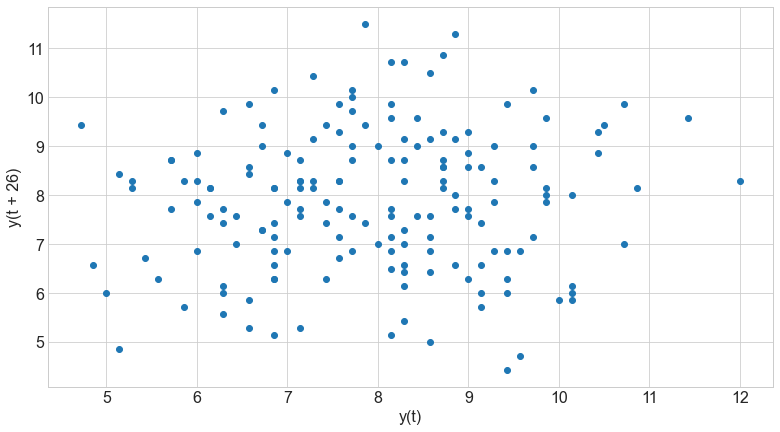

In [105]:
#Using Lag Plot
pd.plotting.lag_plot(train.count_of_crime.resample('W').mean(), lag=26)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

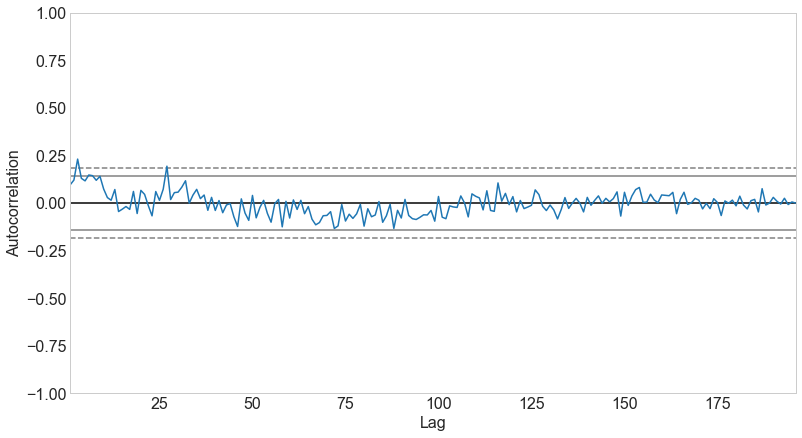

In [106]:
#Does not look significantly different
pd.plotting.autocorrelation_plot(train.count_of_crime.resample('W').mean())

In [107]:
#Seasonal Decomposition
y = train.count_of_crime.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
date,,,,
2015-06-21,10.142857,NaN,-0.295876,NaN
2015-06-28,8.571429,NaN,-0.914236,NaN
2015-07-05,11.428571,NaN,0.728392,NaN
2015-07-12,9.714286,NaN,-0.303202,NaN
2015-07-19,7.142857,NaN,1.129491,NaN


<AxesSubplot:xlabel='date'>

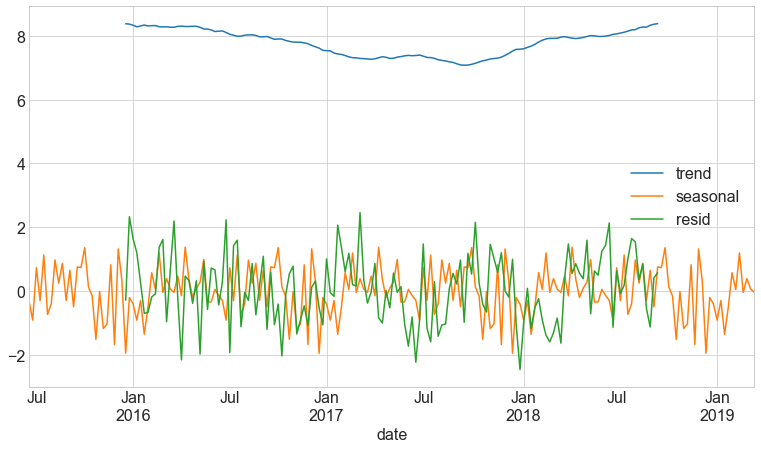

In [108]:
decomposition.iloc[:, 1:].plot()

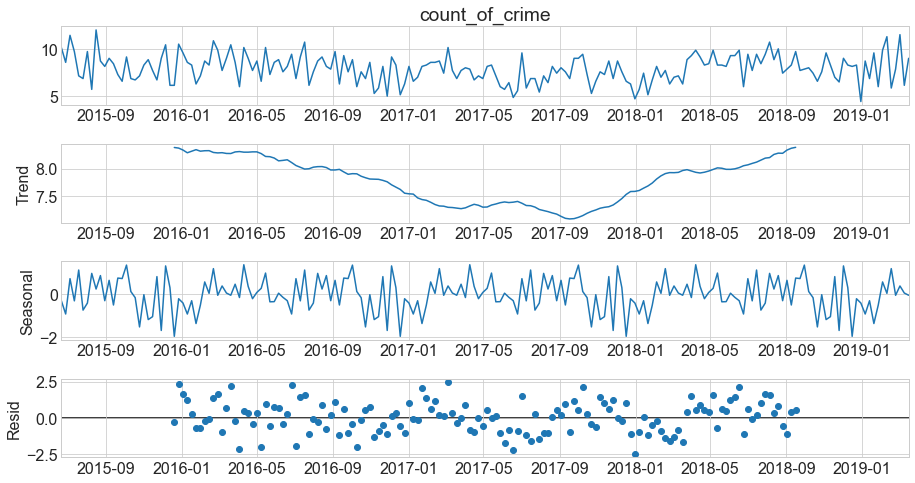

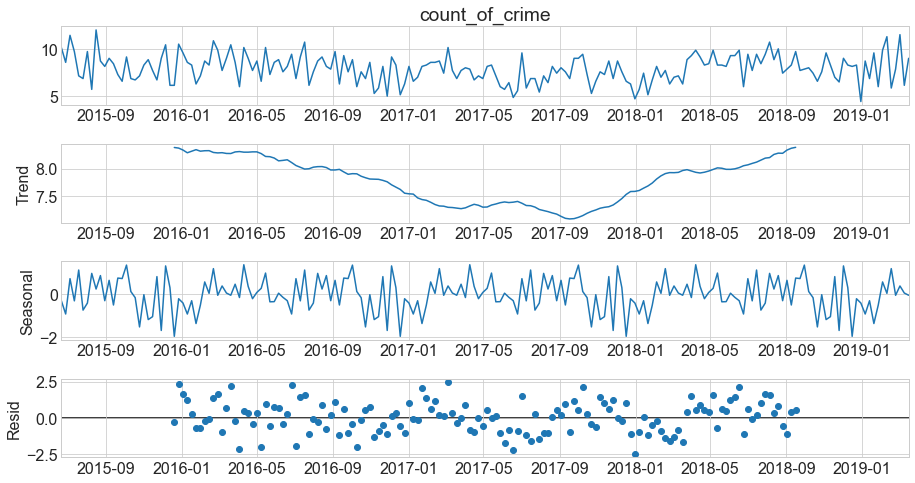

In [109]:
decomposition.iloc[:, 1:].plot()

In [110]:
#Since Time Series data is sensitive to length of time in predictions, lets use 2 years of train, 
#1 year validate, 1 year test

### Redoing Train test split (2 years, 1 year, 1 year)

In [111]:
# ### Performing new train-test split
train = new_df.loc['2017-03-14':'2019-03-15']
validate = new_df.loc['2019-03-16':'2020-03-16']
test = new_df.loc['2020-03-16': '2021-03-15']

In [112]:
print(f'The length of train is:{len(train)}')
print(f'The length of validate is:{len(validate)}')
print(f'The length of test is:{len(test)}')

The length of train is:730
The length of validate is:364
The length of test is:364


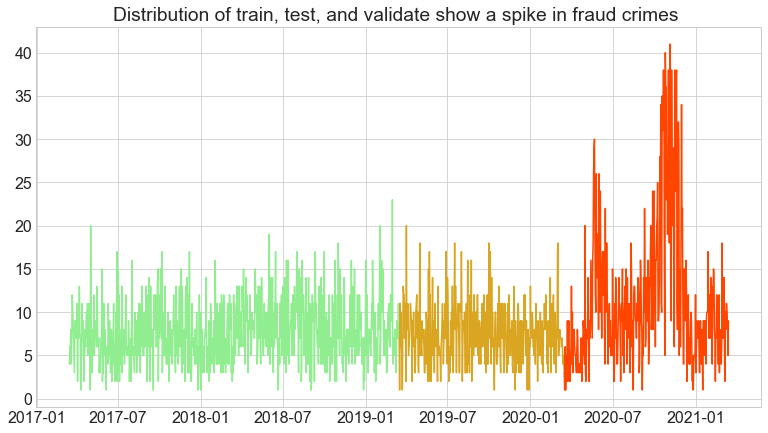

In [113]:
plt.title('Distribution of train, test, and validate show a spike in fraud crimes ')
plt.plot(train.index, train.count_of_crime, color='lightgreen')
plt.plot(validate.index, validate.count_of_crime, color='goldenrod')
plt.plot(test.index, test.count_of_crime, color='orangered')
plt.show()

# Statistical Testing

# Modeling

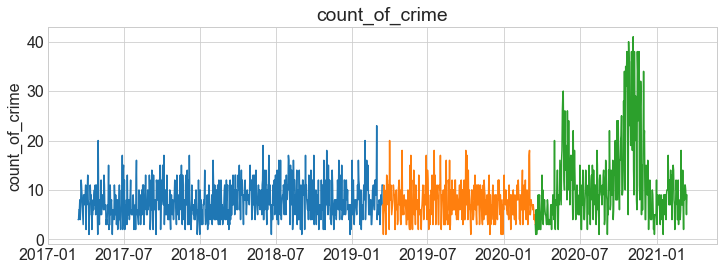

In [114]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [8]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [116]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

### # Create the empty dataframe

In [ ]:
#Create eval df to place results
eval_df = pd.DataFrame(columns=['model_type', 'rmse'])

In [117]:
# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Make Predictions: Last Observed Value

In [118]:
crime = train['count_of_crime'][-1:][0]
yhat_df = pd.DataFrame({'count_of_crime': [crime]}, 
                       index = validate.index)

yhat_df.head(2)

,count_of_crime
date,
2019-03-16,11
2019-03-17,11


### Plot actual vs predicted values

count_of_crime -- RMSE: 5


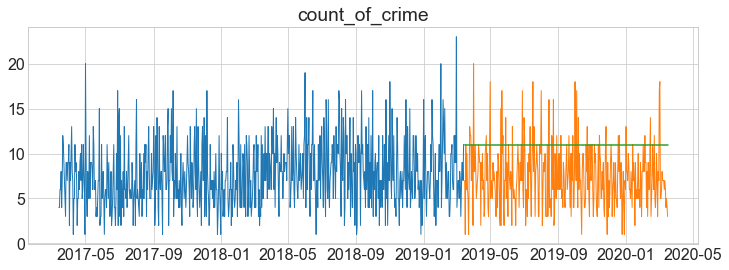

In [119]:
plot_and_eval('count_of_crime')

In [120]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'count_of_crime')

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [121]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0


In [ ]:
def last_observed_model(train, validate, test):
    #Make predictions df
    crime = train['count_of_crime'][-1:][0]
    yhat_df = pd.DataFrame({'count_of_crime': [crime]}, 
                       index = validate.index)
    #Make predictions and place in predictions df
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'count_of_crime')

## Simple Average

### Make Predictions

In [122]:
crime = round(train['count_of_crime'].mean(), 2)


yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)

yhat_df.head(3)

,count_of_crime
date,
2019-03-16,7.72
2019-03-17,7.72
2019-03-18,7.72


### Plot and Evaluate

count_of_crime -- RMSE: 3


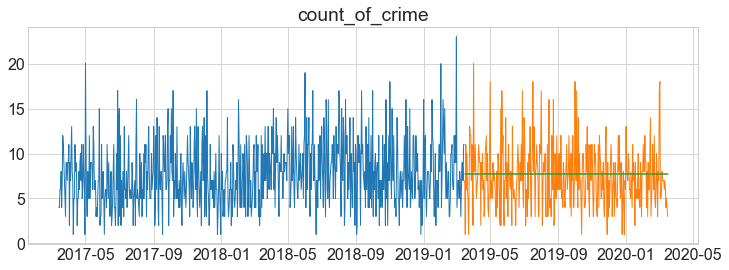

In [123]:
for col in train.columns:
    plot_and_eval('count_of_crime')

### Evaluate

In [124]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = 'count_of_crime')
eval_df

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0


## Moving Average

In [125]:
#Make Predictions

In [126]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 30

crime = round(train['count_of_crime'].rolling(period).mean().iloc[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)
yhat_df.head(2)

,count_of_crime
date,
2019-03-16,8.03
2019-03-17,8.03


### Plot Actual vs Predicted

count_of_crime -- RMSE: 4


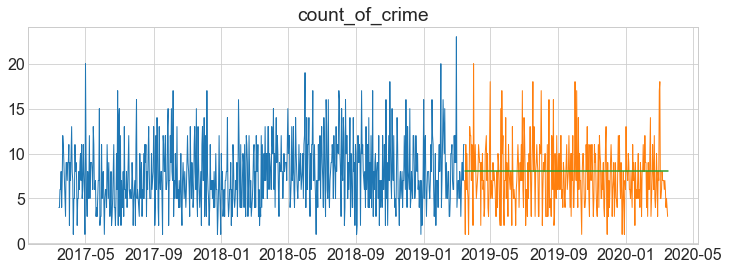

In [127]:
plot_and_eval('count_of_crime')

### Evaluate

In [128]:
for col in train.columns:
    eval_df = append_eval_df(model_type='30d moving average', 
                             target_var = 'count_of_crime')
eval_df

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0


### Use more moving averages to predict

In [129]:
periods = [60, 90, 120]

for p in periods:
    crime = round(train['count_of_crime'].rolling(p).mean().iloc[-1], 2)

    yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)

    model_type = str(p) + 'd moving average'
    eval_df = append_eval_df(model_type = model_type,
                             target_var = 'count_of_crime'
                            )

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [130]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0


## Which is best so far?

In [131]:
# get the min rmse for each variable

min_rmse_dollars_sold = eval_df.groupby('target_var')['rmse'].min()[0]

# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[((eval_df.rmse == min_rmse_dollars_sold))]


,model_type,target_var,rmse
1,simple_average,count_of_crime,3.0


### Holt's Linear Trend

#### Basic Holt's Linear Trend

**Make Predictions**

Now, like we would when using sklearn, we will create the Holt object, fit the model, and make predictions. 

Holt: 

- exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)
- damped $\phi$ = True/False: with Holt, forecasts will increase or decrease indefinitely into the future.  To avoid this, use the Damped trend method which has a damping parameter 0< ϕ <1. 


fit: 

- smoothing_level ($\alpha$): value between (0,1)
    - Closer to 0, the level doesn't change with each new observation
    - Closer to 1, the level reacts strongly with each new observation
- smoothing_slope ($\beta$): value between (0,1)
    - Closer to 0, trend is not changing over time
    - Closer to 1, trend is changing significantly over time
- optimized: use the auto-optimization that allow statsmodels to automatically find an optimized value for us. 

In [132]:
train.columns

Index(['count_of_crime'], dtype='object')

In [133]:
# Create and fit our Holt's Object
model = Holt(train['count_of_crime'], exponential = False, damped=True)
model = model.fit(smoothing_level = .1, smoothing_trend = .1, optimized = True)

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/3163450469.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['count_of_crime'], exponential = False, damped=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [134]:
validate.index[-1]

Timestamp('2020-03-16 00:00:00')

In [135]:
validate.shape

(364, 1)

In [136]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0


In [137]:
# Create the model object
model_holt = Holt(train['count_of_crime'], exponential=False, damped_trend=True).fit(optimized=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [138]:
model_holt

In [139]:
print(model_holt.summary())

                              Holt Model Results                              
Dep. Variable:         count_of_crime   No. Observations:                  730
Model:                           Holt   SSE                           9376.852
Optimized:                       True   AIC                           1873.657
Trend:                       Additive   BIC                           1896.622
Seasonal:                        None   AICC                          1873.812
Seasonal Periods:                None   Date:                 Thu, 15 Dec 2022
Box-Cox:                        False   Time:                         09:02:15
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0170879                alpha                 True
smoothing_trend            0.0170879                

In [140]:
# make predictions for each date in validate 
predictions_holt = model_holt.forecast(len(validate))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [141]:
predictions_holt.index=yhat_df.index

In [142]:
predictions_holt

date
2019-03-16    8.197046
2019-03-17    8.197598
2019-03-18    8.198040
2019-03-19    8.198394
2019-03-20    8.198676
                ...   
2020-03-12    8.199807
2020-03-13    8.199807
2020-03-14    8.199807
2020-03-15    8.199807
2020-03-16    8.199807
Length: 364, dtype: float64

In [143]:
# add predictions to yhat_df
yhat_df['count_of_crime'] = round(predictions_holt, 2)

In [144]:
yhat_df

,count_of_crime
date,
2019-03-16,8.2
2019-03-17,8.2
2019-03-18,8.2
2019-03-19,8.2
2019-03-20,8.2
...,...
2020-03-12,8.2
2020-03-13,8.2
2020-03-14,8.2


count_of_crime -- RMSE: 4


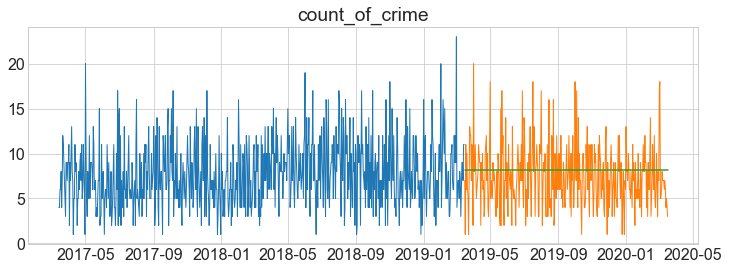

In [145]:
for col in train.columns:
    plot_and_eval(target_var = 'count_of_crime')

In [146]:
eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = 'count_of_crime')
eval_df

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0
6,Holts,count_of_crime,4.0


### Holts Seasonal Trend

#### I went back and changed the length of train to be exactly 2 seasons (365*2) otherwise holts seasonal would not work

In [147]:
fit1 = ExponentialSmoothing(train.count_of_crime, seasonal_periods=365, trend='add', seasonal='add', use_boxcox=True).fit()#(use_boxcox=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [148]:
fit2 = ExponentialSmoothing(train.count_of_crime, seasonal_periods=365, trend='add', seasonal='add', damped_trend=True,use_boxcox=True).fit()#(use_boxcox=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [149]:
#fit1.params, fit2.params

In [150]:
results_quantity=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])

In [151]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']

In [152]:
#Results for Holts Exponential Smoothing fit 1
results_quantity["Additive_Quantity"] = [fit1.params[p] for p in params] + [fit1.sse]

In [153]:
#Results for Holts Exponential Smoothing fit 2
results_quantity["Additive_Damp_Quantity"] = [fit2.params[p] for p in params] + [fit2.sse]

In [154]:
results_quantity

,Additive_Quantity,Additive_Damp_Quantity
$\alpha$,1.490116e-08,1.490242e-08
$\beta$,2.155964e-10,6.655386e-09
$\phi$,NaN,9.950000e-01
$\gamma$,0.000000e+00,5.257472e-10
$l_0$,2.922669e+00,2.569605e+00
$b_0$,1.391801e-03,5.904827e-03
SSE,4.527637e+03,4.552244e+03


#### Additive Quantity (Fit 1) Is best (See SSE) but thats not saying much!

In [155]:
yhat_df = fit1.forecast(validate.shape[0]).rename('count_of_crime').to_frame()
yhat_df

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,count_of_crime
730,9.660756
731,5.646230
732,10.612668
733,7.388362
734,8.453207
...,...
1089,10.612783
1090,7.522272
1091,9.606561
1092,5.796665


In [156]:
#Evaluating for Holts seasonal
evaluate('count_of_crime')

5.0

In [157]:
#Adding it back to eval df
eval_df = append_eval_df('seasonal_holts_add', 'count_of_crime')

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [158]:
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0
6,Holts,count_of_crime,4.0
0,last_observed_value,count_of_crime,5.0
7,seasonal_holts_add,count_of_crime,5.0


In [3]:
#get clean data
df = w.get_clean_data()
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [4]:
#Make fraud df
fraud_df = w.create_fraud_df(df)

In [5]:
#Train test split
train, validate, test = e.train_validate_test_split(fraud_df)

In [9]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [10]:
# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [11]:
def model_evaluation(train, validate, test):
    #Create eval df to place results
    eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
    #Last Observed Model
    crime = train['count_of_crime'][-1:][0]
    yhat_df = pd.DataFrame({'count_of_crime': [crime]}, 
                       index = validate.index)
    #Make predictions and place in predictions df
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'count_of_crime')
    #Simple Average
    crime = round(train['count_of_crime'].mean(), 2)
    yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)
    #Make predictions and place in predictions df
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = 'count_of_crime')
    
    #Moving Average: compute a 30 day rolling average 
    period = 30
    crime = round(train['count_of_crime'].rolling(period).mean().iloc[-1], 2)
    yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)
    #Make predictions and place in predictions df
    eval_df = append_eval_df(model_type='30d moving average', 
                             target_var = 'count_of_crime')
    #Moving Average: 60, 90, 120
    periods = [60, 90, 120]
    for p in periods:
        crime = round(train['count_of_crime'].rolling(p).mean().iloc[-1], 2)

        yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)

        model_type = str(p) + 'd moving average'
        eval_df = append_eval_df(model_type = model_type,
                             target_var = 'count_of_crime')
    #Holts Linear
    # Create the model object
    model_holt = Holt(train['count_of_crime'], exponential=False, damped_trend=True).fit(optimized=True)
    # make predictions for each date in validate 
    predictions_holt = model_holt.forecast(len(validate))
    #Set index
    predictions_holt.index=yhat_df.index
    # add predictions to yhat_df
    yhat_df['count_of_crime'] = round(predictions_holt, 2)
    #Add to eval df
    eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = 'count_of_crime')
    
    #Holts seasonal
    fit1 = ExponentialSmoothing(train.count_of_crime, seasonal_periods=365, trend='add',
                                seasonal='add', use_boxcox=True).fit()
    fit2 = ExponentialSmoothing(train.count_of_crime, seasonal_periods=365, trend='add',
                                seasonal='add', damped_trend=True,use_boxcox=True).fit()
    yhat_df = fit1.forecast(validate.shape[0]).rename('count_of_crime').to_frame()
    #Adding it back to eval df
    eval_df = append_eval_df('seasonal_holts_add', 'count_of_crime')
    
    return eval_df

In [12]:
eval_df = model_evaluation(train, validate, test)

NameError: name 'yhat_df' is not defined

### Predict Based on Previous Cycle

Take all the 2016 data points, compute the daily delta, year-over-year, average that delta over all the days, and adding that average to the previous year's value on a day will give you the forecast for that day. 

If a primary cycle is weekly, then you may want to do this on a week-over-week cadence. 

In the below example:  
1. Compute the 365 average year over year differences from 2013 through 2015
2. Add that average delta to the values during 2015. 
3. Set the index in your yhat dataframe to represent the dates those predictions are make for. 

Let's get started....

**Re-split data**

In [159]:
# # ### Performing new train-test split
# train = new_df.loc['2017-03-14':'2019-03-15']
# validate = new_df.loc['2019-03-16':'2020-03-16']
# test = new_df.loc['2020-03-16': '2021-03-15']

In [160]:
# print(train.shape)
# print(validate.shape)
# print(test.shape)

# train.head()

(730, 1)
(364, 1)
(364, 1)


,count_of_crime
date,
2017-03-14,4
2017-03-15,4
2017-03-16,6
2017-03-17,6
2017-03-18,8


### Make Predictions

In [ ]:
# train.diff(365) #.mean() is the average of those changes
# # Remember .diff uses values one year back
# #.mean() takes average of columns

In [163]:
# # finding the year-over-year difference for each day from 2017 to 2019 (train)
# # taking the mean, and then adding that value to the daily values. 

# yhat_df = train.loc['2018-03-15':'2019-03-15'] + train.diff(365).mean() #Adds that average
# #These are predictions for 2016, index is incorrect (see above)

In [164]:
#We looked 365 days later, and created a series made up of all those differences

In [165]:
# #Checking shapes to match
# yhat_df.shape

(364, 1)

In [166]:
# validate.shape

(364, 1)

In [167]:
# train.diff(365).mean() 
# You take any point and look one year prior, this is mean difference from one year out to one year back

count_of_crime    1.353425
dtype: float64

### Back to predictions

In [168]:
# train.loc['2018-03-15':'2019-03-15'].head()  #this is the REAL data

,count_of_crime
date,
2018-03-15,4
2018-03-16,11
2018-03-17,5
2018-03-18,5
2018-03-19,10


In [169]:
# #Predictions
# yhat_df.head() #4 is true value, 1.35 is prediction, then we add them (see 2018-03-15 value)

,count_of_crime
date,
2018-03-15,5.353425
2018-03-16,12.353425
2018-03-17,6.353425
2018-03-18,6.353425
2018-03-19,11.353425


In [170]:
# # # let's peek into the prediction we will make by comparing the predicted value 
# # # (train values + year-over-year average difference) to the actual train value
# pd.concat([yhat_df.head(1), validate.head(1)])

,count_of_crime
date,
2018-03-15,5.353425
2019-03-16,7.000000


In [171]:
# # set yhat_df to index of validate
# yhat_df.index = validate.index

In [172]:
# yhat_df.head() #Now this is the predictions for validate

,count_of_crime
date,
2019-03-16,5.353425
2019-03-17,12.353425
2019-03-18,6.353425
2019-03-19,6.353425
2019-03-20,11.353425


count_of_crime -- RMSE: 6


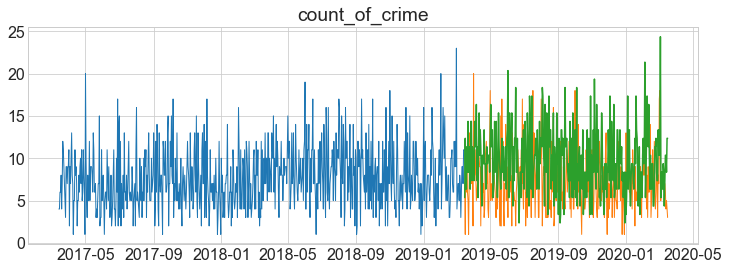

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_85914/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [173]:
# plot_and_eval(target_var = 'count_of_crime')
# eval_df = append_eval_df(model_type = "previous_year", 
#                             target_var = 'count_of_crime')

In [174]:
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0
6,Holts,count_of_crime,4.0
0,last_observed_value,count_of_crime,5.0
7,seasonal_holts_add,count_of_crime,5.0
8,previous_year,count_of_crime,6.0


### Running model on test

#### Simple Average (Baseline) is the best predictor of fraud crimes, with an RMSE score of 3, we will evaluate this on test

In [175]:
crime = round(train['count_of_crime'].mean(), 2)


yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = test.index)

yhat_df.head(3)

,count_of_crime
date,
2020-03-16,7.72
2020-03-17,7.72
2020-03-18,7.72


In [176]:
# evaluation function for test
def evaluate_test(target_var):
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse

In [177]:
evaluate_test('count_of_crime')

9.0

### Extremely large RMSE (9) not surprising!

In [178]:
# plot and evaluate 
def plot_and_eval_test(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title('Simple Average Model Performance on Test')
    rmse = evaluate_test(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

count_of_crime -- RMSE: 9


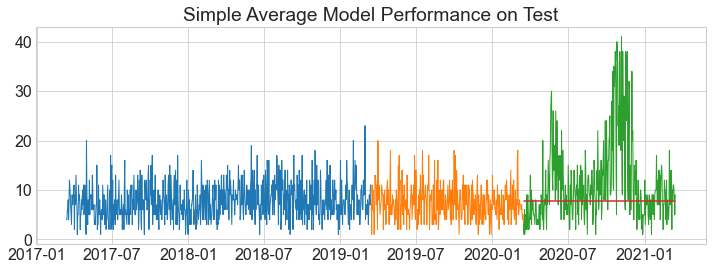

In [179]:
plot_and_eval_test('count_of_crime')

## Modeling Summary

## Back to Explore/Evaluate

In [180]:
train.head()

,count_of_crime
date,
2017-03-14,4
2017-03-15,4
2017-03-16,6
2017-03-17,6
2017-03-18,8


In [181]:
train.count_of_crime.mean()

7.720547945205479

### Question: Have fraud crime levels returned to normal since the pandemic?

#### Post-Covid Data for time since lockdown in Boston ended

In [182]:
post_covid_df = fraud_df['2021-03-16':]

In [183]:
post_covid_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2021-03-16,212017320,1102,unknown,fraud - false pretense / scheme,E18,480,0,2021,3,Tuesday,17,unknown,BISMARCK ST,0.000000,0.000000,"(0, 0)",1
2021-03-16,212016778,1102,unknown,fraud - false pretense / scheme,D4,167,0,2021,3,Tuesday,10,unknown,TREMONT ST,42.339542,-71.069409,"(42.33954198983014, -71.06940876967543)",1
2021-03-16,212017102,1102,unknown,fraud - false pretense / scheme,NaN,574,0,2021,3,Tuesday,16,unknown,WASHINGTON ST,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)",1
2021-03-16,212016842,1102,unknown,fraud - false pretense / scheme,E5,691,0,2021,3,Tuesday,12,unknown,WESTBOURNE ST,42.287135,-71.148580,"(42.28713461273519, -71.14857953709628)",1
2021-03-16,212016903,1102,unknown,fraud - false pretense / scheme,D14,801,0,2021,3,Tuesday,20,unknown,FARRINGTON AVE,42.354459,-71.130913,"(42.3544593889186, -71.13091268127926)",1


In [184]:
#Now grouping by day
post_covid_df = post_covid_df.groupby(['date']).sum()

In [185]:
post_covid_df.head()

,offense_code,shooting,year,month,hour,lat,long,count_of_crime
date,,,,,,,,
2021-03-16,7718,0,14147,21,120,254.012486,-426.544737,7
2021-03-17,7727,0,14147,21,97,296.187284,-497.617165,7
2021-03-18,11052,0,20210,30,114,423.215403,-710.848397,10
2021-03-19,7739,0,14147,21,83,253.925331,-426.531514,7
2021-03-20,6629,0,12126,18,52,253.943039,-426.494229,6


In [186]:
#create new df for just target variable
post_covid_df = post_covid_df[['count_of_crime']]

In [187]:
post_covid_df.head(2)

,count_of_crime
date,
2021-03-16,7
2021-03-17,7


In [188]:
post_covid_df.count_of_crime.mean()

5.767628205128205

#### Pre-Covid Data (Looking at two years immediately before pandemic

In [189]:
pre_covid_df = fraud_df['2018-03-15':'2020-03-15']

In [190]:
#Now grouping by day
pre_covid_df = pre_covid_df.groupby(['date']).sum()

In [191]:
pre_covid_df = pre_covid_df[['count_of_crime']]

In [192]:
pre_covid_df.head()

,count_of_crime
date,
2018-03-15,4
2018-03-16,11
2018-03-17,5
2018-03-18,5
2018-03-19,10


In [193]:
pre_covid_df.count_of_crime.mean()

7.929848693259973

In [194]:
post_covid_df.count_of_crime.mean()

5.767628205128205

### Looks like fraud crimes have decreased since. Let's run a stats test

### Comparing Fraud Crimes from pre-pandemic levels to post-pandemic levels

* Count of Crimes is a continuous variable, and both populations are independent, so an independent T-Test is required. 
* I used a 95% confidence interval (alpha value .05)
* Variances were tested and not equal, and indicated in testing parameter

Hypotheses:

$H_0$: **Fraud crime rates pre-pandemic are less than or equal to fraud crime rates post pandemic**

$H_a$: **Fraud crime rates pre-pandemic are greater than fraud crime rates post pandemic.**

In [195]:
#Need to run a levene test to check variances
#Need to ensure variances are equal
stat, pval = stats.levene(pre_covid_df.count_of_crime, post_covid_df.count_of_crime)
pval
# pval is significant so we can conclude variances are NOT equal

3.0040485675488156e-05

In [196]:
def pre_post_t_test(fraud_df):
    '''get t-test for pre and post covid fraud crimes'''
    #Seperate samples into pre-covid and post-covid lockdown
    post_covid_df = fraud_df['2021-03-16':]
    pre_covid_df = fraud_df['2018-03-15':'2020-03-16']
    #Grouping by day
    post_covid_df = post_covid_df.groupby(['date']).sum()
    pre_covid_df = pre_covid_df.groupby(['date']).sum()
    #Run t-test on these groups, variances are not equal
    t, p = stats.ttest_ind(pre_covid_df.count_of_crime, post_covid_df.count_of_crime, equal_var=False)
    #Set Alpha
    alpha = 0.05
    
    null_hypothesis = "Fraud crime rates pre-pandemic are less than or equal to fraud crime rates post pandemic."
    alternative_hypothesis = "Fraud crime rates pre-pandemic are greater than fraud crime rates post pandemic."
    
    if (p/2 < alpha) & (t > 0):
        print("Reject the null hypothesis that", null_hypothesis)
        print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
    else:
        print("Fail to reject the null")

    print(f't = {t:.4f}')
    print(f'p = {p:.4f}') 

In [197]:
pre_post_t_test(fraud_df)

Reject the null hypothesis that Fraud crime rates pre-pandemic are less than or equal to fraud crime rates post pandemic.
Sufficient evidence to move forward understanding that Fraud crime rates pre-pandemic are greater than fraud crime rates post pandemic.
t = 12.0437
p = 0.0000


#### These values are significantly different. 

### How much fraud crime happened during the year lockdown of the pandemic? (March 2020-March 2021)

In [198]:
fraud_df.head(2)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1


In [199]:
#Selected year of lockdown
lockdown_df = fraud_df['2020-03-15':'2021-03-15']

In [200]:
lockdown_df.head(2)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2020-03-15,202038475,1102,unknown,fraud - false pretense / scheme,C6,200,0,2020,3,Sunday,0,unknown,W FIFTH ST,42.341288,-71.054679,"(42.3412875043904, -71.054679326494)",1
2020-03-15,202021134,1106,unknown,fraud - credit card / atm fraud,C6,913,0,2020,3,Sunday,20,unknown,OYSTER BAY RD,42.319364,-71.039601,"(42.3193637226598, -71.0396010960372)",1


In [201]:
#4125 total fraud crimes committed 
lockdown_df.count_of_crime.sum()

4125

In [202]:
#Now grouping by day
lockdown_fraud = lockdown_df.groupby(['date']).sum()

In [203]:
lockdown_fraud.count_of_crime.mean()

11.301369863013699

#### During the lockdown (first year of the pandemic) there were an average of 11.3 fraud crimes reported per day

## Question: Does a model for predicting fraud crime based on data before the pandemic still work for predicting fraud post pandemic lockdown

In [204]:
def train_validate_test_split(df):
    '''This function splits the dataframe by taking two years of data for train 
    (March 2017-March 2019) and validate from the year immediately preceding the pandemic
    (March 2019-March 2020). Finally, it uses test data from when the majority of lockdown 
    restrictions were lifted in the city of Boston (March 2021 onward). It includes only 
    the target of 'count_of_crime', where each row is the total count of fraud crimes occuring
    on that day, and returns train, validate, and test dataframes'''
    #Grouping the data by day
    df = df.groupby(['date']).sum()
    #Creating a DF with only the target
    df = df[['count_of_crime']]
    #Performing the split
    # ### Performing new train-test split
    train = df.loc['2017-03-14':'2019-03-15']
    validate = df.loc['2019-03-16':'2020-03-16']
    test = df.loc['2020-03-16': '2021-03-15']
    
    return train, validate, test

In [205]:
train, validate, test = train_validate_test_split(fraud_df)

In [206]:
train.head()

,count_of_crime
date,
2017-03-14,4
2017-03-15,4
2017-03-16,6
2017-03-17,6
2017-03-18,8


In [207]:
def post_pandemic_split(df):
    '''This function provides a new train test split based on the selection of test
    as crime reported post covid lockdown (March 2021 onwards)'''
    #Group data by day, sum the count of crime, create a new df
    new_df = df.groupby(['date']).sum()
    new_df = new_df[['count_of_crime']]
    ## Performing new train-test split
    train = new_df.loc['2017-03-14':'2019-03-15']
    validate = new_df.loc['2019-03-16':'2020-03-16']
    test = new_df.loc['2021-03-16':]
    
    return train, validate, test

In [208]:
train, validate, test = m.post_pandemic_split(fraud_df)

In [209]:
train.head()

,count_of_crime
date,
2017-03-14,4
2017-03-15,4
2017-03-16,6
2017-03-17,6
2017-03-18,8


In [210]:
# # ### Performing new train-test split
# train = new_df.loc['2017-03-14':'2019-03-15']
# validate = new_df.loc['2019-03-16':'2020-03-16']
# test = new_df.loc['2021-03-16':]

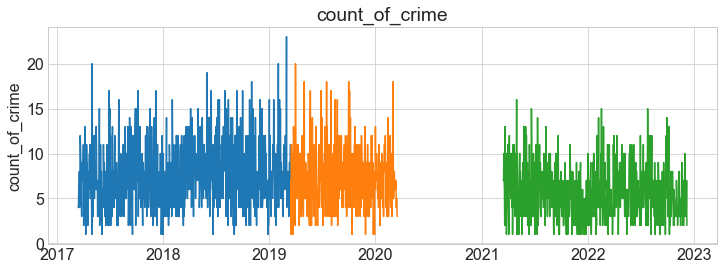

In [211]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

### Evaluate using simple average, our best model from previous modeling iteration:

In [212]:
# evaluation function to compute rmse for post-covid data using simple average model
def evaluate_post_test(df, target_var):
    '''This function uses the simple average model to make predictions on test data,
    and returns the RMSE from this model'''
    #Splitting data
    train, validate, test = post_pandemic_split(fraud_df)
    #Make predictions from trainbased on simple average
    crime = round(train['count_of_crime'].mean(), 2)
    yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = test.index)
    #Calculate RMSE based on predictions
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    
    return rmse

In [213]:
m.evaluate_post_test(fraud_df, 'count_of_crime')

4.0

In [214]:
train.index

DatetimeIndex(['2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17',
               '2017-03-18', '2017-03-19', '2017-03-20', '2017-03-21',
               '2017-03-22', '2017-03-23',
               ...
               '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-09',
               '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13',
               '2019-03-14', '2019-03-15'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

In [215]:
y=train.count_of_crime

In [216]:
y.head()

date
2017-03-14    4
2017-03-15    4
2017-03-16    6
2017-03-17    6
2017-03-18    8
Name: count_of_crime, dtype: int64

<AxesSubplot:ylabel='Frequency'>

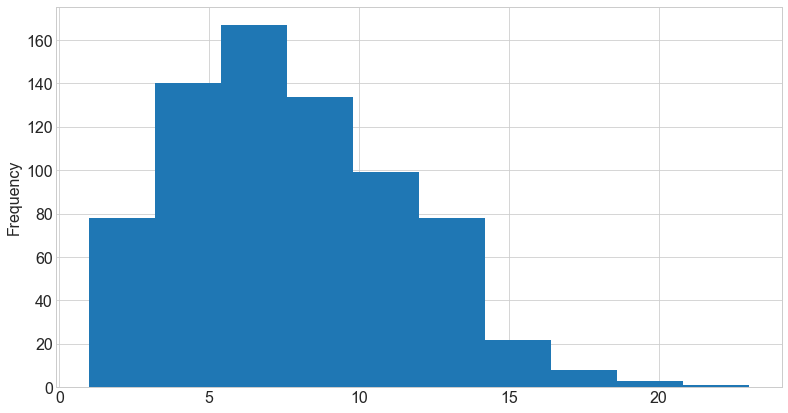

In [217]:
y.plot.hist()

In [218]:
fraud_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1
2015-06-15,I162055778,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,6,Monday,9,Part Two,DARTMOUTH ST,42.342830,-71.073747,"(42.34283015, -71.07374670)",1
2015-06-15,I152049596,1106,confidence games,fraud - credit card / atm fraud,B3,470,0,2015,6,Monday,13,Part Two,COLORADO ST,42.277793,-71.099172,"(42.27779311, -71.09917239)",1
2015-06-15,I152049603,1102,fraud,fraud - false pretense / scheme,D4,128,0,2015,6,Monday,13,Part Two,STUART ST,42.349836,-71.071051,"(42.34983631, -71.07105135)",1


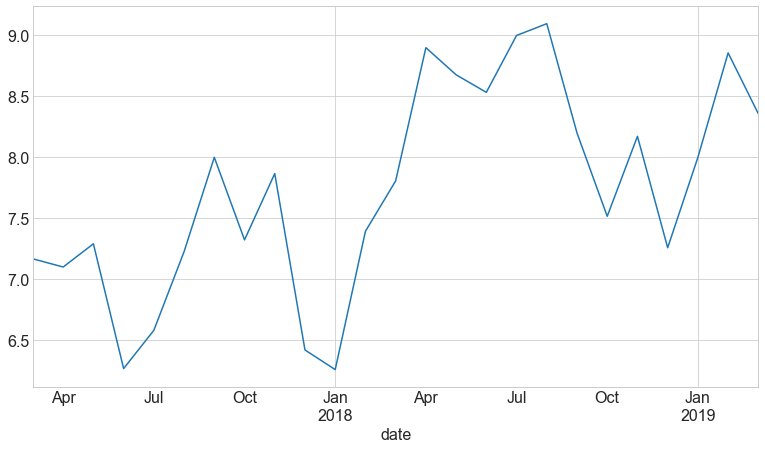

In [219]:
#Visualize by month
# Resampling the time series data based on monthly 'M' frequency
df_month = y.resample("M").mean()
df_month.plot()
plt.show()

In [220]:
test.index

DatetimeIndex(['2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
               '2021-03-20', '2021-03-21', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-25',
               ...
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-04', '2022-12-05', '2022-12-06',
               '2022-12-07', '2022-12-08'],
              dtype='datetime64[ns]', name='date', length=624, freq=None)

In [221]:
z=test.count_of_crime
z.head()

date
2021-03-16     7
2021-03-17     7
2021-03-18    10
2021-03-19     7
2021-03-20     6
Name: count_of_crime, dtype: int64

<AxesSubplot:ylabel='Frequency'>

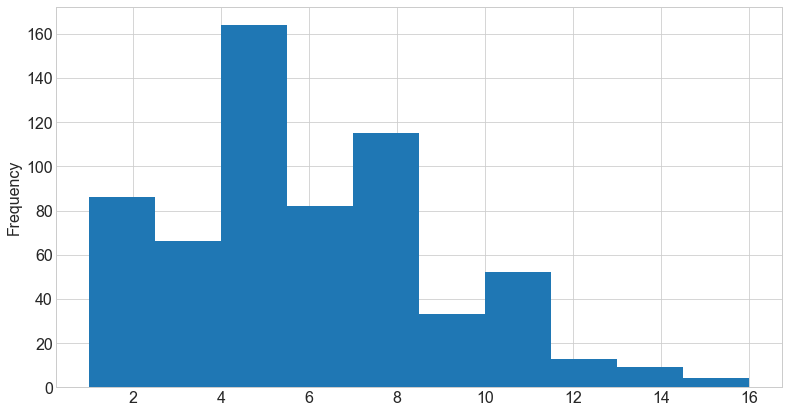

In [222]:
z.plot.hist()

In [223]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [224]:
ungrouped_fraud = df[df['offense_description'].str.contains('fraud')]
ungrouped_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21247 entries, 1 to 652354
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   incident_number      21247 non-null  object 
 1   offense_code         21247 non-null  int64  
 2   offense_code_group   21247 non-null  object 
 3   offense_description  21247 non-null  object 
 4   district             21109 non-null  object 
 5   reporting_area       21247 non-null  object 
 6   shooting             21247 non-null  int64  
 7   occurred_on_date     21247 non-null  object 
 8   year                 21247 non-null  int64  
 9   month                21247 non-null  int64  
 10  day_of_week          21247 non-null  object 
 11  hour                 21247 non-null  int64  
 12  ucr_part             21247 non-null  object 
 13  street               21166 non-null  object 
 14  lat                  21049 non-null  float64
 15  long                 21049 non-null

In [225]:
ungrouped_fraud.offense_code.value_counts()

1102    10049
1106     5557
1107     3419
1108     1156
1109     1054
1100       11
1105        1
Name: offense_code, dtype: int64

In [226]:
ungrouped_fraud[ungrouped_fraud['offense_description'].str.contains('impersonation')]

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
5,I182090458,1107,fraud,fraud - impersonation,C11,336,0,2015-12-04 00:00:00,2015,12,Friday,0,Part Two,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)"
6,I182081063,1107,fraud,fraud - impersonation,E18,478,0,2015-12-01 12:25:00,2015,12,Tuesday,12,Part Two,RUSKINDALE RD,42.268897,-71.108137,"(42.26889666, -71.10813750)"
15,I182044114,1107,fraud,fraud - impersonation,E18,486,0,2015-07-01 12:00:00,2015,7,Wednesday,12,Part Two,OAKCREST RD,42.264521,-71.104292,"(42.26452149, -71.10429211)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650397,222002181,1107,unknown,fraud - impersonation,C6,0,0,2022-01-09 14:37:00,2022,1,Sunday,14,unknown,SOUTHAMPTON ST,42.332108,-71.070144,"(42.332108429494895, -71.07014394813551)"
650677,222001780,1107,unknown,fraud - impersonation,C11,402,0,2022-01-09 16:19:00,2022,1,Sunday,16,unknown,BURT ST,42.284135,-71.069574,"(42.284135356782706, -71.06957385355688)"
651913,220340225,1107,unknown,fraud - impersonation,B3,465,0,2022-07-21 09:00:00,2022,7,Thursday,9,unknown,BLUE HILL AVENUE,0.000000,0.000000,"(0, 0)"
651940,220131047,1107,unknown,fraud - impersonation,E13,574,0,2022-02-15 00:00:00,2022,2,Tuesday,0,unknown,WASHINGTON ST,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)"


In [227]:
ungrouped_fraud.offense_description.value_counts()

fraud - false pretense / scheme    10048
fraud - credit card / atm fraud     5557
fraud - impersonation               3419
fraud - welfare                     1156
fraud - wire                        1054
migrated report - fraud               11
frauds - all other                     1
fraud - false pretense                 1
Name: offense_description, dtype: int64

[Text(0.5, 1.0, 'Average Number of Fraud Crimes by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Count of Crimes')]

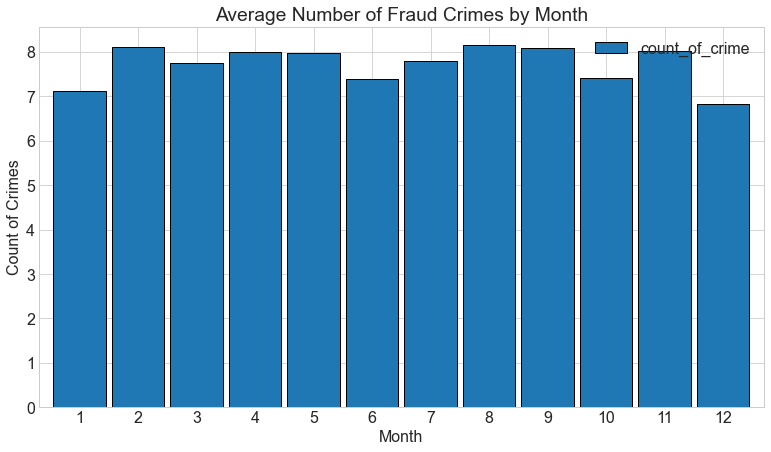

In [228]:
ax = train.groupby(train.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Number of Fraud Crimes by Month', xlabel='Month', ylabel='Count of Crimes')

In [229]:
#Make a df for visualization by month
#Now grouping by day
fraud_viz = fraud_df.groupby(['date']).sum()

In [230]:
fraud_viz

,offense_code,shooting,year,month,hour,lat,long,count_of_crime
date,,,,,,,,
2015-06-15,12142,0,22165,66,115,465.506774,-782.107727,11
2015-06-16,9945,0,18135,54,92,380.807546,-639.660966,9
2015-06-17,13252,0,24180,72,167,465.418112,-782.087668,12
2015-06-18,13260,0,24180,72,125,507.915044,-852.707129,12
2015-06-19,12130,0,22165,66,120,465.477288,-781.950608,11
...,...,...,...,...,...,...,...,...
2022-12-04,5516,0,10110,60,54,169.155029,-284.381760,5
2022-12-05,3306,0,6066,36,31,84.636150,-142.298720,3
2022-12-06,4415,0,8088,48,61,169.400092,-284.318481,4


In [231]:
#Making y with just target variable
y = fraud_viz.count_of_crime
y.head()

date
2015-06-15    11
2015-06-16     9
2015-06-17    12
2015-06-18    12
2015-06-19    11
Name: count_of_crime, dtype: int64

<AxesSubplot:ylabel='Frequency'>

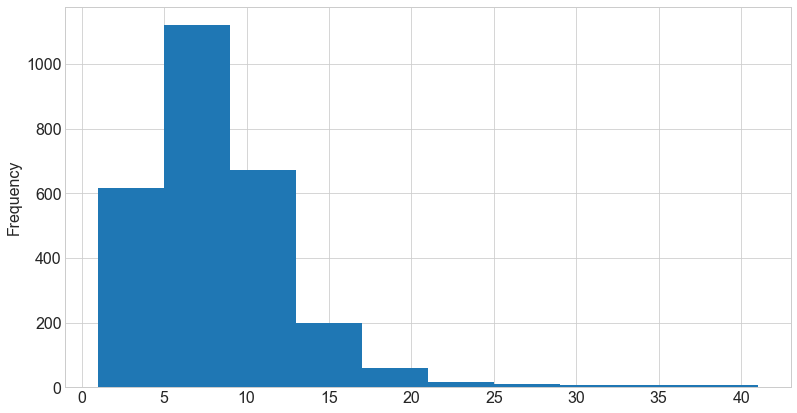

In [232]:
y.plot.hist()

## Use .index() as y axis!!

In [233]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [234]:
fraud_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1
2015-06-15,I162055778,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,6,Monday,9,Part Two,DARTMOUTH ST,42.342830,-71.073747,"(42.34283015, -71.07374670)",1
2015-06-15,I152049596,1106,confidence games,fraud - credit card / atm fraud,B3,470,0,2015,6,Monday,13,Part Two,COLORADO ST,42.277793,-71.099172,"(42.27779311, -71.09917239)",1
2015-06-15,I152049603,1102,fraud,fraud - false pretense / scheme,D4,128,0,2015,6,Monday,13,Part Two,STUART ST,42.349836,-71.071051,"(42.34983631, -71.07105135)",1


In [235]:
montly_fraud_viz = fraud_viz.resample('M').mean()

In [ ]:
#Get Fraud DF for visualizations
def create_fraud_df_viz(df):
    #Uses str.contains to get fraud from description
    fraud_df_viz = df[df['offense_description'].str.contains('fraud')]
    #Rename date column to make it easier
    fraud_df_viz.rename(columns = {'occurred_on_date':'date'}, inplace = True)
    #Occured on date is an object, lets make it date time
    fraud_df_viz['date'] = pd.to_datetime(fraud_df_viz['date'])
    #adding a column to the dataframe to get a count of crime
    fraud_df_viz['count_of_crime'] = 1
    #Remove hour from date time, since we aren't looking for that now
    fraud_df_viz['date'] = fraud_df_viz['date'].dt.normalize()
    
    return fraud_df_viz

In [ ]:
fraud_df_viz = create_fraud_df_viz(df)

In [ ]:
fraud_df_viz.head()

In [ ]:
def monthly_fraud_viz(fraud_df):
    #Aggregate sum of fraud by day
    fraud_df = fraud_df.groupby(['date']).sum()
    #Create series with just target variable
    y = fraud_df.count_of_crime
    #Resampled by month, average taken
    y.resample('M').mean().plot(figsize=(12,8), color='cornflowerblue')
    #Set style
    sns.set_style("darkgrid")
    #Plot it
    plt.title('Mean Fraud Crimes Resampled by Month', fontsize='18')
    plt.xlabel('Date')
    plt.ylabel('Average Fraud Crimes')
    #Set V lines and annotation for pandemic
    plt.axvline(dt.datetime(2020, 3, 15), color='tab:red', linestyle= '--')
    plt.axvline(dt.datetime(2021, 3, 15), color='tab:red', linestyle= '--')
    plt.text(dt.datetime(2019,2,15), 15, 'Lockdown Began')
    plt.text(dt.datetime(2021,4,15), 15, 'Lockdown Ended')
    plt.show()

In [ ]:
monthly_fraud_viz(fraud_df)

In [ ]:
fraud_df = fraud_df.groupby(['date']).sum()

In [ ]:
y = fraud_df.count_of_crime

In [ ]:
y.head()

In [ ]:
#Making y with just target variable
y.resample('M').mean().plot(figsize=(12,8), color='cornflowerblue')
#Set theme
sns.set_theme()
#Plot it
plt.title('Mean Fraud Crimes Resampled by Month', fontsize='18')
plt.xlabel('Date')
plt.ylabel('Average Fraud Crimes')
#Set V lines for pandemic
plt.axvline(dt.datetime(2020, 3, 15), color='tab:red', linestyle= '--')
plt.axvline(dt.datetime(2021, 3, 15), color='tab:red', linestyle= '--')
plt.text(dt.datetime(2019,2,15), 15, 'Lockdown Began')
plt.text(dt.datetime(2021,4,15), 15, 'Lockdown Ended')
#Add arrows to point to pandemic
plt.show()

##### monthly_fraud_viz

In [ ]:
fraud_df.reset_index(inplace=True)

In [ ]:
fraud_df

In [ ]:
train, validate, test = e.train_validate_test_split(fraud_df)

In [ ]:
train.head(2)

In [ ]:
def train_test_viz(train, validate, test):
    '''This function visualizes the train, validate, test split utilized in modeling'''
    #Set Style
    sns.set_style('darkgrid')
    # change the figure size
    plt.figure(figsize=(12,8))
    plt.title('Distribution of Train, Test, and Validate', fontsize='18')
    #Plot it
    plt.plot(train.index, train.count_of_crime, color='powderblue')
    plt.plot(validate.index, validate.count_of_crime, color='lightskyblue')
    plt.plot(test.index, test.count_of_crime, color='dodgerblue')
    #Label Axes
    plt.xlabel('Date')
    plt.ylabel('Count of Fraud Crimes')
    #Annotation
    plt.axvline(dt.datetime(2020, 3, 15), color='crimson', linestyle= '--')
    plt.text(dt.datetime(2019,1,30), 25, 'COVID Pandemic Begins')
    plt.show()

In [ ]:
train_test_viz(train, validate, test)

### Distribution of target variable

In [246]:
#Get Clean Data
df = w.get_clean_data()
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [247]:
#Create Fraud DF
fraud_df = w.create_fraud_df(df)

In [248]:
#Train test split
train, validate, test = e.train_validate_test_split(fraud_df)

In [249]:
train.head(2)

,count_of_crime
date,
2017-03-14,4
2017-03-15,4


In [250]:
#Create y out of target variable
y = train.count_of_crime
y.head()

date
2017-03-14    4
2017-03-15    4
2017-03-16    6
2017-03-17    6
2017-03-18    8
Name: count_of_crime, dtype: int64

In [294]:
def target_dist_viz(train):
    '''This function visualizes the distribution of the target variable (Count of
    Crimes) by visualizing its frequency in training data. X axis represents number of
    crimes reported by day'''
    #Set style
    sns.set_style('darkgrid')
    #define font family to use for all text
    plt.rcParams['font.sans-serif'] = ['Verdana']
    #Distribution of target variable histogram
    fig, ax = plt.subplots(figsize =(10, 7))
    #Plot it
    y.plot.hist(color='paleturquoise',ec='gray')
    #Title
    plt.title('2017-2019 Distribution of Fraud Crimes Occuring Per Day')
    #Annotation and labels
    dfmean = y.mean()
    plt.axvline(dfmean, color = 'indianred', linestyle=':', linewidth=2)
    ax.text(dfmean, 0.99, 'Mean', color='indianred', ha='right', va='top', rotation=90,
            transform=ax.get_xaxis_transform())
    plt.xlabel('Daily Number of Fraud Crimes Occuring')
    plt.ylabel('Frequency of Days')
    plt.show()

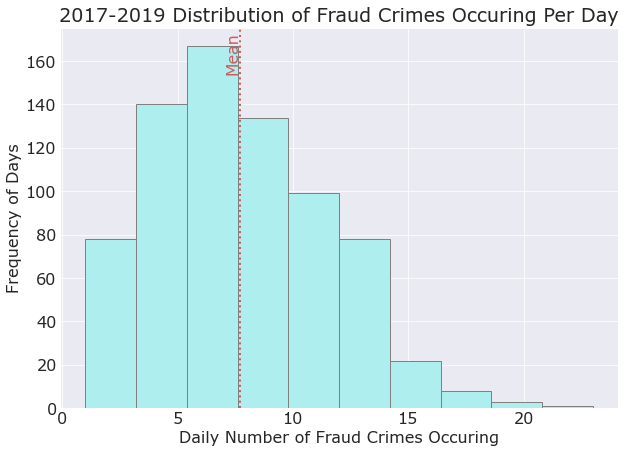

In [295]:
target_dist_viz(train)

In [254]:
y.mean(), y.median()

(7.720547945205479, 7.0)

In [237]:
#Seasonal Decomposition
y = train.count_of_crime.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2017-03-19,5.333333,NaN,-1.844580,NaN
2017-03-26,7.714286,NaN,0.711738,NaN
2017-04-02,8.000000,NaN,1.163661,NaN
2017-04-09,7.857143,NaN,1.759815,NaN
2017-04-16,6.714286,NaN,1.057892,NaN


<AxesSubplot:xlabel='date'>

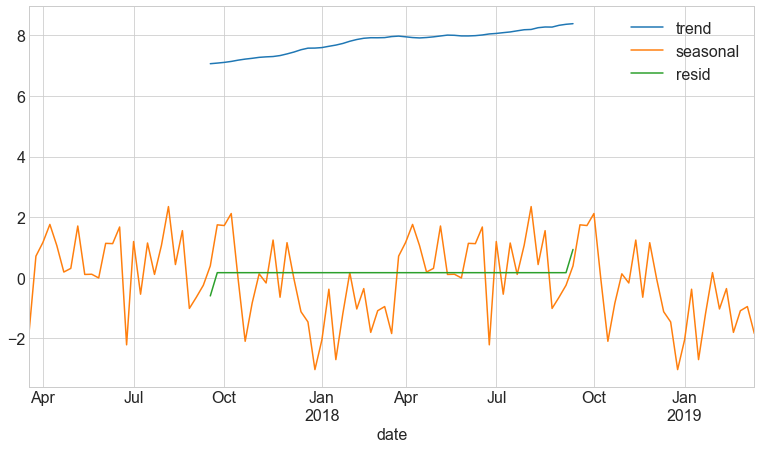

In [238]:
decomposition.iloc[:, 1:].plot()

<AxesSubplot:xlabel='date'>

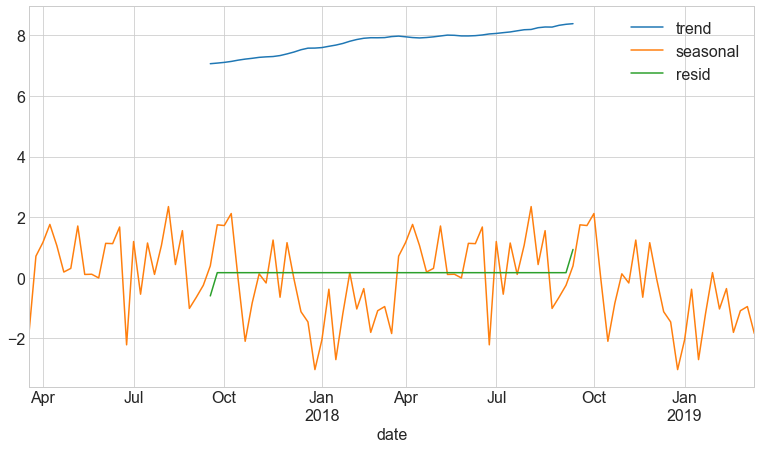

In [239]:
decomposition.iloc[:, 1:].plot()

<AxesSubplot:xlabel='date'>

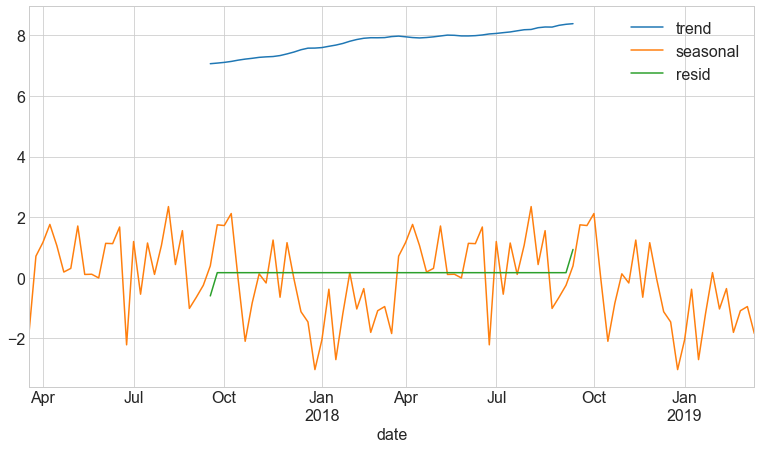

In [240]:
decomposition.iloc[:, 1:].plot()

In [2]:
#get clean data
df = w.get_clean_data()

In [3]:
#Create fraud df
fraud_df = w.create_fraud_df(df)

In [4]:
#Train test split
train, validate, test = e.train_validate_test_split(fraud_df)

In [6]:
# evaluation function to compute rmse
def evaluate_holt(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [7]:
# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate_holt(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [8]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate_holt(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [8]:
predictions_train = pd.DataFrame(index=train.index)
predictions_validate = pd.DataFrame(index=validate.index)

In [9]:
predictions_train.head(1)

""
date
2017-03-14


In [10]:
scores = pd.DataFrame(columns=['model_name', 'train_score', 'validate_score'])

In [11]:
def evaluate(target_name: str, model_name: str):
    RMSE_train = round(np.sqrt(mean_squared_error(train[target_name], predictions_train[model_name])))
    RMSE_validate = round(np.sqrt(mean_squared_error(validate[target_name], predictions_validate[model_name])))
    scores.loc[len(scores)] = [model_name, RMSE_train, RMSE_validate]
    
    # plot
    plt.figure(figsize = (12,4))
    plt.plot(train[target_name], label='Train', linewidth=1)
    plt.plot(validate[target_name], label='Validate', linewidth=1)
    plt.plot(predictions_train[model_name], label=model_name + '_train')
    plt.plot(predictions_validate[model_name], label=model_name + '_validate')
    plt.title(target_name)
    
    print(target_name, '-- RMSE train: {:.0f}'.format(RMSE_train))
    print(target_name, '-- RMSE validate: {:.0f}'.format(RMSE_validate))
    plt.show()

### Simple Average

In [12]:
avg_crime = round(train['count_of_crime'].mean(), 2)

In [13]:
avg_crime

7.72

In [14]:
predictions_train['simple_average'] = avg_crime
predictions_validate['simple_average'] = avg_crime

In [15]:
predictions_validate.head()

,simple_average
date,
2019-03-16,7.72
2019-03-17,7.72
2019-03-18,7.72
2019-03-19,7.72
2019-03-20,7.72


count_of_crime -- RMSE train: 4
count_of_crime -- RMSE validate: 3


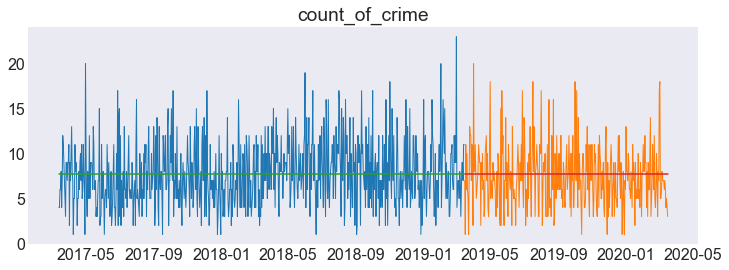

In [16]:
evaluate('count_of_crime', 'simple_average')

In [17]:
scores

,model_name,train_score,validate_score
0,simple_average,4,3


### Moving average

In [18]:
target = 'count_of_crime'

In [19]:
period = 30
ma = '30 d moving_average'
rolling_count = round(train.count_of_crime.rolling(period).mean()[-1], 2)
predictions_train[ma] = rolling_count
predictions_validate[ma] = rolling_count

count_of_crime -- RMSE train: 4
count_of_crime -- RMSE validate: 4


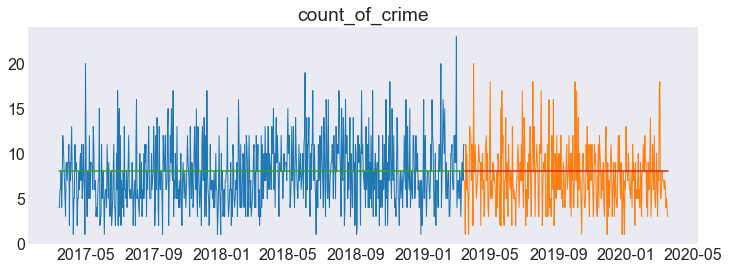

In [20]:
evaluate(target, ma)

In [21]:
scores

,model_name,train_score,validate_score
0,simple_average,4,3
1,30 d moving_average,4,4


### 90 day moving average

In [22]:
target = 'count_of_crime'

In [23]:
period = 90
ma = '90 d moving_average'
rolling_count_90 = round(train.count_of_crime.rolling(period).mean()[-1], 2)
predictions_train[ma] = rolling_count_90
predictions_validate[ma] = rolling_count_90

count_of_crime -- RMSE train: 4
count_of_crime -- RMSE validate: 4


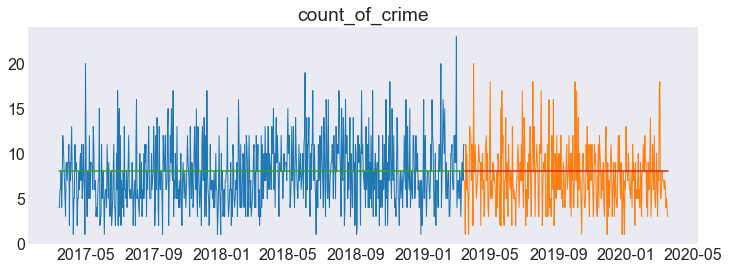

In [24]:
evaluate(target, ma)

In [25]:
scores

,model_name,train_score,validate_score
0,simple_average,4,3
1,30 d moving_average,4,4
2,90 d moving_average,4,4


In [14]:
def eval_timeseries_models(train,validate,test):
    '''This function evaluates time series models, taking in train, validate
    and test, and producing a dataframe with their performances on train and validate data'''
    #Making predictions dataframes
    predictions_train = pd.DataFrame(index=train.index)
    predictions_validate = pd.DataFrame(index=validate.index)
    #Creating scores dataframe
    scores = pd.DataFrame(columns=['model_name', 'train_score', 'validate_score'])
    
    #Simple average
    avg_crime = round(train['count_of_crime'].mean(), 2)
    predictions_train['simple_average'] = avg_crime
    predictions_validate['simple_average'] = avg_crime
    RMSE_train = round(np.sqrt(mean_squared_error(train['count_of_crime'], predictions_train['simple_average'])))
    RMSE_validate = round(np.sqrt(mean_squared_error(validate['count_of_crime'], predictions_validate['simple_average'])))
    model_name='simple_average'
    scores.loc[len(scores)] = [model_name, RMSE_train, RMSE_validate]
    
    #Moving averages
    target = 'count_of_crime'
    period = 30
    ma = '30 d moving_average'
    rolling_count = round(train.count_of_crime.rolling(period).mean()[-1], 2)
    predictions_train[ma] = rolling_count
    predictions_validate[ma] = rolling_count
    RMSE_train = round(np.sqrt(mean_squared_error(train['count_of_crime'], predictions_train['30 d moving_average'])))
    RMSE_validate = round(np.sqrt(mean_squared_error(validate['count_of_crime'], predictions_validate['30 d moving_average'])))
    model_name='30 d moving_average'
    scores.loc[len(scores)] = [model_name, RMSE_train, RMSE_validate]
    
    period = 90
    ma = '90 d moving_average'
    rolling_count_90 = round(train.count_of_crime.rolling(period).mean()[-1], 2)
    predictions_train[ma] = rolling_count_90
    predictions_validate[ma] = rolling_count_90
    RMSE_train = round(np.sqrt(mean_squared_error(train['count_of_crime'], predictions_train['90 d moving_average'])))
    RMSE_validate = round(np.sqrt(mean_squared_error(validate['count_of_crime'], predictions_validate['90 d moving_average'])))
    model_name='90 d moving_average'
    scores.loc[len(scores)] = [model_name, RMSE_train, RMSE_validate]
    
    return scores

In [15]:
scores = m.eval_timeseries_models(train,validate, test)
scores

,model_name,train_score,validate_score
0,simple_average,4,3
1,30 d moving_average,4,4
2,90 d moving_average,4,4


### Holts Linear and Seasonal

In [26]:
#Create eval df to place results
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

In [27]:
#Building column for prediction df
crime = train['count_of_crime'][-1:][0]

In [28]:
yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)

#### Linear

In [29]:
# Create the model object
model_holt = Holt(train['count_of_crime'], exponential=False, damped_trend=True).fit(optimized=True)

In [30]:
# make predictions for each date in validate 
predictions_holt = model_holt.forecast(len(validate))

In [31]:
#Set index to return date time
predictions_holt.index=yhat_df.index

In [32]:
# add predictions to yhat_df
yhat_df['count_of_crime'] = round(predictions_holt, 2)

In [33]:
eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = 'count_of_crime')
eval_df

,model_type,target_var,rmse
0,Holts,count_of_crime,4.0


#### Seasonal

In [34]:
#fit
fit1 = ExponentialSmoothing(train.count_of_crime, seasonal_periods=365, trend='add',
                            seasonal='add', use_boxcox=True).fit()
#forecast
predictions_holt_seasonal = fit1.forecast(validate.shape[0]).rename('count_of_crime').to_frame()

In [35]:
#Set index
predictions_holt_seasonal.index = yhat_df.index

In [36]:
# add predictions to yhat_df
yhat_df['count_of_crime'] = round(predictions_holt, 2)

In [37]:
eval_df = append_eval_df(model_type = 'Holts seaonal add', 
                             target_var = 'count_of_crime')
eval_df

,model_type,target_var,rmse
0,Holts,count_of_crime,4.0
1,Holts seaonal add,count_of_crime,4.0


In [38]:
def evaluate_holt_models(train,validate,test):
    #Create eval df to place results
    eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
    #Building place for predictions
    crime = train['count_of_crime'][-1:][0]
    yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)
    
    #Holts Linear
    # Create the model object
    model_holt = Holt(train['count_of_crime'], exponential=False, damped_trend=True).fit(optimized=True)
    # make predictions for each date in validate 
    predictions_holt = model_holt.forecast(len(validate))
    #Set index to return date time
    predictions_holt.index=yhat_df.index
    # add predictions to yhat_df
    yhat_df['count_of_crime'] = round(predictions_holt, 2)
    #Place results in evaluate dataframe
    eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = 'count_of_crime')
    
    #holts seasonal
    #fit
    fit1 = ExponentialSmoothing(train.count_of_crime, seasonal_periods=365, trend='add',
                            seasonal='add', use_boxcox=True).fit()
    #forecast
    predictions_holt_seasonal = fit1.forecast(validate.shape[0]).rename('count_of_crime').to_frame()
    #Set index
    predictions_holt_seasonal.index = yhat_df.index
    # add predictions to yhat_df
    yhat_df['count_of_crime'] = round(predictions_holt, 2)
    eval_df = append_eval_df(model_type = 'Holts seaonal add', 
                             target_var = 'count_of_crime')
    
    return eval_df

In [39]:
evaluate_holt_models(train,validate,test)

,model_type,target_var,rmse
0,Holts,count_of_crime,4.0
1,Holts seaonal add,count_of_crime,4.0
2,Holts seaonal add,count_of_crime,4.0


In [7]:
def eval_simple_test(train,validate,test):
    '''This function evaluates simple average model, taking in train, validate
    and test, and producing a dataframe with their performances on train,validate and test'''
    #Making predictions dataframes
    predictions_train = pd.DataFrame(index=train.index)
    predictions_validate = pd.DataFrame(index=validate.index)
    predictions_test = pd.DataFrame(index=test.index)
    
    #Creating scores dataframe
    scores = pd.DataFrame(columns=['model_name', 'train_score', 'validate_score', 'test_score'])
    
    #Simple average
    avg_crime = round(train['count_of_crime'].mean(), 2)
    predictions_train['simple_average'] = avg_crime
    predictions_validate['simple_average'] = avg_crime
    predictions_test['simple_average'] = avg_crime
    RMSE_train = round(np.sqrt(mean_squared_error(train['count_of_crime'], predictions_train['simple_average'])))
    RMSE_validate = round(np.sqrt(mean_squared_error(validate['count_of_crime'], predictions_validate['simple_average'])))
    RMSE_test=round(np.sqrt(mean_squared_error(test['count_of_crime'], predictions_test['simple_average'])))
    model_name='simple_average'
    scores.loc[len(scores)] = [model_name, RMSE_train, RMSE_validate, RMSE_test]
    
    
    return scores

In [6]:
eval_simple_test(train,validate,test)

,model_name,train_score,validate_score,test_score
0,simple_average,4,3,9


## Post Modeling

In [97]:
df2015 = df[df['month'] ==2015]

In [100]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [101]:
def create_fraud_stats_df(df):
    '''This function takes in the crime dataframe, and creates a new dataframe based on the categorization
    of crime description. It also renames columns for usability, converts the date column to a DateTime type,
    takes the date and transforms the index into a DateTime index, and adds a column called "count of crime",
    which assigns a value of 1 to every row'''
    #Uses str.contains to get fraud from description
    fraud_df = df[df['offense_description'].str.contains('fraud')]
    #Rename date column to make it easier
    fraud_df.rename(columns = {'occurred_on_date':'date'}, inplace = True)
    #Occured on date is an object, lets make it date time
    fraud_df['date'] = pd.to_datetime(fraud_df['date'])
    #adding a column to the dataframe to get a count of crime
    fraud_df['count_of_crime'] = 1
    #Remove hour from date time, since we aren't looking for that now
    fraud_df['date'] = fraud_df['date'].dt.normalize()
    return fraud_df

In [104]:
fraud_stats_df = create_fraud_stats_df(df)

In [105]:
fraud_stats_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)",1
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)",1
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)",1
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)",1
5,I182090458,1107,fraud,fraud - impersonation,C11,336,0,2015-12-04,2015,12,Friday,0,Part Two,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)",1


In [108]:
#Separating data by year
fraud_df_2015 = fraud_stats_df[fraud_stats_df.year == 2015]
fraud_df_2016 = fraud_stats_df[fraud_stats_df.year == 2016]
fraud_df_2017 = fraud_stats_df[fraud_stats_df.year == 2017]
fraud_df_2018 = fraud_stats_df[fraud_stats_df.year == 2018]
fraud_df_2019 = fraud_stats_df[fraud_stats_df.year == 2019]
fraud_df_2020 = fraud_stats_df[fraud_stats_df.year == 2020]
fraud_df_2021 = fraud_stats_df[fraud_stats_df.year == 2021]
fraud_df_2022 = fraud_stats_df[fraud_stats_df.year == 2022]

In [109]:
fraud_stats_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)",1
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)",1
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)",1
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)",1
5,I182090458,1107,fraud,fraud - impersonation,C11,336,0,2015-12-04,2015,12,Friday,0,Part Two,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)",1


In [110]:
fraud_df_2017.mean()

offense_code      1104.419151
shooting             0.000000
year              2017.000000
month                6.407601
hour                11.499627
lat                 42.074886
long               -70.684734
count_of_crime       1.000000
dtype: float64

In [9]:
fraud_2017 = fraud_df.loc['2017-01-01':'2018-1-1']

In [37]:
fraud_2017.head()

,offense_code,shooting,year,month,hour,lat,long,count_of_crime
date,,,,,,,,
2017-01-01,15470,0,28238,14,87,592.320193,-995.126462,14
2017-01-02,4416,0,8068,4,61,169.233381,-284.464354,4
2017-01-03,14367,0,26221,13,175,550.110152,-924.056495,13
2017-01-04,7747,0,14119,7,78,296.343428,-497.557830,7
2017-01-05,5533,0,10085,5,69,211.585693,-355.491052,5


In [11]:
#Now grouping by day
fraud_2017 = fraud_2017.groupby(['date']).sum()

In [12]:
fraud_2017.head()

,offense_code,shooting,year,month,hour,lat,long,count_of_crime
date,,,,,,,,
2017-01-01,15470,0,28238,14,87,592.320193,-995.126462,14
2017-01-02,4416,0,8068,4,61,169.233381,-284.464354,4
2017-01-03,14367,0,26221,13,175,550.110152,-924.056495,13
2017-01-04,7747,0,14119,7,78,296.343428,-497.557830,7
2017-01-05,5533,0,10085,5,69,211.585693,-355.491052,5


In [ ]:
fraud_2017.groupby(['date']).sum()

In [14]:
#Create y out of target variable
y = fraud_2017.count_of_crime

In [15]:
y.head()

date
2017-01-01    14
2017-01-02     4
2017-01-03    13
2017-01-04     7
2017-01-05     5
Name: count_of_crime, dtype: int64

In [25]:
y.mean()

7.360655737704918

In [17]:
fraud_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1
2015-06-15,I162055778,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,6,Monday,9,Part Two,DARTMOUTH ST,42.342830,-71.073747,"(42.34283015, -71.07374670)",1
2015-06-15,I152049596,1106,confidence games,fraud - credit card / atm fraud,B3,470,0,2015,6,Monday,13,Part Two,COLORADO ST,42.277793,-71.099172,"(42.27779311, -71.09917239)",1
2015-06-15,I152049603,1102,fraud,fraud - false pretense / scheme,D4,128,0,2015,6,Monday,13,Part Two,STUART ST,42.349836,-71.071051,"(42.34983631, -71.07105135)",1


In [18]:
#Making a population df for stats test
fraud_df= fraud_df.groupby(['date']).sum()

In [20]:
fraud_df.head()

,offense_code,shooting,year,month,hour,lat,long,count_of_crime
date,,,,,,,,
2015-06-15,12142,0,22165,66,115,465.506774,-782.107727,11
2015-06-16,9945,0,18135,54,92,380.807546,-639.660966,9
2015-06-17,13252,0,24180,72,167,465.418112,-782.087668,12
2015-06-18,13260,0,24180,72,125,507.915044,-852.707129,12
2015-06-19,12130,0,22165,66,120,465.477288,-781.950608,11


In [21]:
z = fraud_df.count_of_crime

In [22]:
z.mean()

7.825782688766115

### Comparing Fraud Crimes from 2017 to Fraud Crimes from the entire dataset

* Count of Crimes is a continuous variable, and we have one sample, so a one sample T-Test is required. 
* I used a 95% confidence interval (alpha value .05)

Hypotheses:

$H_0$: **Mean Fraud crime rate in 2017 is greater than or equal to fraud crime rates of the population (entire dataset)**

$H_a$: **Mean Fraud crime rate in 2017 is less than fraud crime rates of the population (entire dataset)**

In [23]:
#Need to run a levene test to check variances
#Need to ensure variances are equal
stat, pval = stats.levene(y, z)
pval
# pval is significant so we can conclude variances are NOT equal

0.008594858933590774

In [32]:
alpha = 0.05

overall_population = z.mean()
t, p = stats.ttest_1samp(y, overall_population)

print(f't-statistic:{round(t,3)}, P-Value:{round(p/2,3)}, alpha={alpha}')

t-statistic:-2.504, P-Value:0.006, alpha=0.05


In [38]:
def get_2017_ttest(fraud_df):
    '''This function compares the mean of fraud crimes in 2017 to the mean of fraud crimes for the
    dataframe using a one-sample t-test'''
    #Separate 2017 values
    fraud_2017 = fraud_df.loc['2017-01-01':'2018-1-1']
    #Now grouping by day
    fraud_2017 = fraud_2017.groupby(['date']).sum()
    #Making a population df for stats test
    fraud_df= fraud_df.groupby(['date']).sum()
    #Create y out of target variable
    y = fraud_2017.count_of_crime
    z = fraud_df.count_of_crime
    # Taking the mean for the t-test
    overall_population = z.mean()
    #Setting alpha and running the test
    alpha = 0.05
    t, p = stats.ttest_1samp(y, overall_population)
    
    return print(f't-statistic:{round(t,3)}, P-Value:{round(p/2,3)}, alpha={alpha}')

In [39]:
get_2017_ttest(fraud_df)

t-statistic:-2.504, P-Value:0.006, alpha=0.05


In [44]:
def get_april_ttest(fraud_df):
    '''This function compares fraud rates in the month of April, pre-pandemic, to fraud rates
    of all other months'''
    #Making df of just april
    april_df = fraud_df[(fraud_df.month == 4) & (fraud_df.year < 2020)]
    #Now grouping by day
    april_df = april_df.groupby(['date']).sum()
    #Making a population df for stats test
    fraud_df= fraud_df.groupby(['date']).sum()
    #Create y out of target variable
    y = april_df.count_of_crime
    z = fraud_df.count_of_crime
    # Taking the mean for the t-test
    overall_population = z.mean()
    #Setting alpha and running the test
    alpha = 0.05
    t, p = stats.ttest_1samp(y, overall_population)
    
    return print(f't-statistic:{round(t,3)}, P-Value:{round(p/2,3)}, alpha={alpha}')

In [45]:
df.reporting_area.value_counts()

0      97865
355     9946
465     7698
167     7013
282     6409
       ...  
000       17
190       10
950        2
218        1
666        1
Name: reporting_area, Length: 881, dtype: int64